# 1. Import Libraries and load dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset = pd.read_csv("Iris.csv")
dataset

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
dataset.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
dataset.shape

(150, 6)

# 2. Checking the missing values.

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [6]:
print(dataset.isnull().sum())

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64


In [7]:
# Checking the duplicated rows
dataset.duplicated().sum()

0

In [42]:

dataset = dataset.drop("Id", axis=1)

In [43]:
cols = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm','PetalWidthCm']
dataset[cols] = dataset[cols].round().astype(int)
dataset

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5,4,1,0,0
1,5,3,1,0,0
2,5,3,1,0,0
3,5,3,2,0,0
4,5,4,1,0,0
...,...,...,...,...,...
145,7,3,5,2,2
146,6,2,5,2,2
147,6,3,5,2,2
148,6,3,5,2,2


In [44]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
dataset['Species'] = le.fit_transform(dataset['Species'])
dataset   
# Setosa → 0
# Versicolor → 1
# Virginica → 2

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5,4,1,0,0
1,5,3,1,0,0
2,5,3,1,0,0
3,5,3,2,0,0
4,5,4,1,0,0
...,...,...,...,...,...
145,7,3,5,2,2
146,6,2,5,2,2
147,6,3,5,2,2
148,6,3,5,2,2


# 3. Statistical Summary and Visualizing Outliers

In [45]:
dataset.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.860000,3.033333,3.793333,1.100000,1.000000
std,0.867226,0.536164,1.792215,0.865056,0.819232
min,4.000000,2.000000,1.000000,0.000000,0.000000
25%,5.000000,3.000000,2.000000,0.000000,0.000000
50%,6.000000,3.000000,4.000000,1.000000,1.000000
75%,6.000000,3.000000,5.000000,2.000000,2.000000
max,8.000000,4.000000,7.000000,2.000000,2.000000


# 4.EDA

In [46]:
dataset['Species'].value_counts()

Species
0    50
1    50
2    50
Name: count, dtype: int64

<Axes: xlabel='Species'>

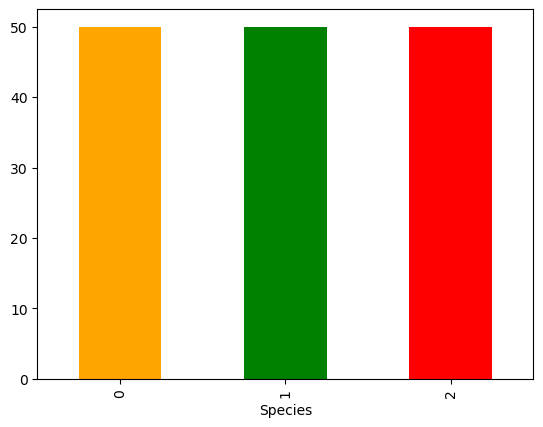

In [47]:
dataset['Species'].value_counts().plot(kind='bar', color=['orange', 'green','red'])

# 3.Splitting the Train and test data

In [48]:
dataset.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [51]:
X = dataset [['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
print(X)

     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0                5             4              1             0
1                5             3              1             0
2                5             3              1             0
3                5             3              2             0
4                5             4              1             0
..             ...           ...            ...           ...
145              7             3              5             2
146              6             2              5             2
147              6             3              5             2
148              6             3              5             2
149              6             3              5             2

[150 rows x 4 columns]


In [52]:
Y = dataset[['Species']]
Y

,Species
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


In [53]:
# PREPROCESSING TECHNIQUE
from sklearn.preprocessing import StandardScaler
Sc = StandardScaler()
X_scaled = Sc.fit_transform(X)



In [54]:
#split the data into train and test 
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=1/3, random_state=0)

In [55]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 1, metric = 'minkowski', p = 2)
classifier.fit(X_train, Y_train)
        

C:\Users\nandh\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=1)

# 6. Prediction and Evaluation

In [56]:
y_pred = classifier.predict(X_test)
y_pred

array([2, 1, 0, 2, 0, 2, 0, 2, 1, 1, 1, 1, 1, 2, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2, 1, 1, 2, 0, 2, 0,
       0, 1, 2, 2, 2, 2], dtype=int64)

In [57]:
# Confusion metrics
from sklearn.metrics import confusion_matrix,accuracy_score, classification_report
cm = confusion_matrix(Y_test, y_pred)
print('cm:',cm)
Accuracy = accuracy_score(Y_test,y_pred)
print('Accuracy:',Accuracy)
clf_report = classification_report(Y_test, y_pred)
print('clf_report:',clf_report)

cm: [[16  0  0]
 [ 0 16  3]
 [ 0  1 14]]
Accuracy: 0.92
clf_report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       0.94      0.84      0.89        19
           2       0.82      0.93      0.88        15

    accuracy                           0.92        50
   macro avg       0.92      0.93      0.92        50
weighted avg       0.92      0.92      0.92        50



# 7.Choosing the Best Value of K

In [58]:
from sklearn.model_selection import GridSearchCV
param_grid = { 'n_neighbors': [1,3,5,7,9,11],'weights':['uniform', 'distance'], 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1,2],'metric':['minkowski', 'euclidean', 'manhattan']}
grid = GridSearchCV(KNeighborsClassifier(),param_grid,refit= True,verbose = 3,n_jobs = 1)
grid.fit(X_train,Y_train)

Fitting 5 folds for each of 288 candidates, totalling 1440 fits
[CV 1/5] END algorithm=auto, metric=minkowski, n_neighbors=1, p=1, weights=uniform;, score=0.850 total time=   0.0s
[CV 2/5] END algorithm=auto, metric=minkowski, n_neighbors=1, p=1, weights=uniform;, score=0.800 total time=   0.0s
[CV 3/5] END algorithm=auto, metric=minkowski, n_neighbors=1, p=1, weights=uniform;, score=0.850 total time=   0.0s
[CV 4/5] END algorithm=auto, metric=minkowski, n_neighbors=1, p=1, weights=uniform;, score=0.850 total time=   0.0s
[CV 5/5] END algorithm=auto, metric=minkowski, n_neighbors=1, p=1, weights=uniform;, score=0.850 total time=   0.0s
[CV 1/5] END algorithm=auto, metric=minkowski, n_neighbors=1, p=1, weights=distance;, score=0.850 total time=   0.0s
[CV 2/5] END algorithm=auto, metric=minkowski, n_neighbors=1, p=1, weights=distance;, score=0.800 total time=   0.0s
[CV 3/5] END algorithm=auto, metric=minkowski, n_neighbors=1, p=1, weights=distance;, score=0.850 total time=   0.0s
[CV 4

C:\Users\nandh\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\nandh\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\nandh\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\nandh\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

[CV 1/5] END algorithm=auto, metric=minkowski, n_neighbors=1, p=2, weights=uniform;, score=0.850 total time=   0.0s
[CV 2/5] END algorithm=auto, metric=minkowski, n_neighbors=1, p=2, weights=uniform;, score=0.800 total time=   0.0s
[CV 3/5] END algorithm=auto, metric=minkowski, n_neighbors=1, p=2, weights=uniform;, score=0.850 total time=   0.0s
[CV 4/5] END algorithm=auto, metric=minkowski, n_neighbors=1, p=2, weights=uniform;, score=0.850 total time=   0.0s
[CV 5/5] END algorithm=auto, metric=minkowski, n_neighbors=1, p=2, weights=uniform;, score=0.850 total time=   0.0s
[CV 1/5] END algorithm=auto, metric=minkowski, n_neighbors=1, p=2, weights=distance;, score=0.850 total time=   0.0s
[CV 2/5] END algorithm=auto, metric=minkowski, n_neighbors=1, p=2, weights=distance;, score=0.800 total time=   0.0s
[CV 3/5] END algorithm=auto, metric=minkowski, n_neighbors=1, p=2, weights=distance;, score=0.850 total time=   0.0s
[CV 4/5] END algorithm=auto, metric=minkowski, n_neighbors=1, p=2, we

C:\Users\nandh\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\nandh\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\nandh\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\nandh\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

[CV 3/5] END algorithm=auto, metric=minkowski, n_neighbors=3, p=1, weights=uniform;, score=0.900 total time=   0.0s
[CV 4/5] END algorithm=auto, metric=minkowski, n_neighbors=3, p=1, weights=uniform;, score=0.900 total time=   0.0s
[CV 5/5] END algorithm=auto, metric=minkowski, n_neighbors=3, p=1, weights=uniform;, score=0.900 total time=   0.0s
[CV 1/5] END algorithm=auto, metric=minkowski, n_neighbors=3, p=1, weights=distance;, score=0.800 total time=   0.0s
[CV 2/5] END algorithm=auto, metric=minkowski, n_neighbors=3, p=1, weights=distance;, score=0.900 total time=   0.0s
[CV 3/5] END algorithm=auto, metric=minkowski, n_neighbors=3, p=1, weights=distance;, score=0.900 total time=   0.0s
[CV 4/5] END algorithm=auto, metric=minkowski, n_neighbors=3, p=1, weights=distance;, score=0.900 total time=   0.0s
[CV 5/5] END algorithm=auto, metric=minkowski, n_neighbors=3, p=1, weights=distance;, score=0.900 total time=   0.0s
[CV 1/5] END algorithm=auto, metric=minkowski, n_neighbors=3, p=2, 

C:\Users\nandh\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\nandh\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\nandh\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\nandh\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

[CV 4/5] END algorithm=auto, metric=minkowski, n_neighbors=3, p=2, weights=uniform;, score=0.900 total time=   0.0s
[CV 5/5] END algorithm=auto, metric=minkowski, n_neighbors=3, p=2, weights=uniform;, score=0.900 total time=   0.0s
[CV 1/5] END algorithm=auto, metric=minkowski, n_neighbors=3, p=2, weights=distance;, score=0.800 total time=   0.0s
[CV 2/5] END algorithm=auto, metric=minkowski, n_neighbors=3, p=2, weights=distance;, score=0.900 total time=   0.0s
[CV 3/5] END algorithm=auto, metric=minkowski, n_neighbors=3, p=2, weights=distance;, score=0.900 total time=   0.0s
[CV 4/5] END algorithm=auto, metric=minkowski, n_neighbors=3, p=2, weights=distance;, score=0.900 total time=   0.0s
[CV 5/5] END algorithm=auto, metric=minkowski, n_neighbors=3, p=2, weights=distance;, score=0.900 total time=   0.0s
[CV 1/5] END algorithm=auto, metric=minkowski, n_neighbors=5, p=1, weights=uniform;, score=0.800 total time=   0.0s
[CV 2/5] END algorithm=auto, metric=minkowski, n_neighbors=5, p=1, 

C:\Users\nandh\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\nandh\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\nandh\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\nandh\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

[CV 5/5] END algorithm=auto, metric=minkowski, n_neighbors=5, p=1, weights=uniform;, score=0.950 total time=   0.0s
[CV 1/5] END algorithm=auto, metric=minkowski, n_neighbors=5, p=1, weights=distance;, score=0.800 total time=   0.0s
[CV 2/5] END algorithm=auto, metric=minkowski, n_neighbors=5, p=1, weights=distance;, score=0.900 total time=   0.0s
[CV 3/5] END algorithm=auto, metric=minkowski, n_neighbors=5, p=1, weights=distance;, score=0.900 total time=   0.0s
[CV 4/5] END algorithm=auto, metric=minkowski, n_neighbors=5, p=1, weights=distance;, score=0.900 total time=   0.0s
[CV 5/5] END algorithm=auto, metric=minkowski, n_neighbors=5, p=1, weights=distance;, score=0.900 total time=   0.0s
[CV 1/5] END algorithm=auto, metric=minkowski, n_neighbors=5, p=2, weights=uniform;, score=0.800 total time=   0.0s
[CV 2/5] END algorithm=auto, metric=minkowski, n_neighbors=5, p=2, weights=uniform;, score=0.900 total time=   0.0s
[CV 3/5] END algorithm=auto, metric=minkowski, n_neighbors=5, p=2, 

C:\Users\nandh\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\nandh\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\nandh\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\nandh\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

[CV 3/5] END algorithm=auto, metric=minkowski, n_neighbors=5, p=2, weights=distance;, score=0.900 total time=   0.0s
[CV 4/5] END algorithm=auto, metric=minkowski, n_neighbors=5, p=2, weights=distance;, score=0.900 total time=   0.0s
[CV 5/5] END algorithm=auto, metric=minkowski, n_neighbors=5, p=2, weights=distance;, score=0.900 total time=   0.0s
[CV 1/5] END algorithm=auto, metric=minkowski, n_neighbors=7, p=1, weights=uniform;, score=0.800 total time=   0.0s
[CV 2/5] END algorithm=auto, metric=minkowski, n_neighbors=7, p=1, weights=uniform;, score=0.950 total time=   0.0s
[CV 3/5] END algorithm=auto, metric=minkowski, n_neighbors=7, p=1, weights=uniform;, score=0.950 total time=   0.0s
[CV 4/5] END algorithm=auto, metric=minkowski, n_neighbors=7, p=1, weights=uniform;, score=0.950 total time=   0.0s
[CV 5/5] END algorithm=auto, metric=minkowski, n_neighbors=7, p=1, weights=uniform;, score=0.950 total time=   0.0s
[CV 1/5] END algorithm=auto, metric=minkowski, n_neighbors=7, p=1, we

C:\Users\nandh\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\nandh\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\nandh\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\nandh\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

[CV 3/5] END algorithm=auto, metric=minkowski, n_neighbors=7, p=2, weights=uniform;, score=0.950 total time=   0.0s
[CV 4/5] END algorithm=auto, metric=minkowski, n_neighbors=7, p=2, weights=uniform;, score=0.950 total time=   0.0s
[CV 5/5] END algorithm=auto, metric=minkowski, n_neighbors=7, p=2, weights=uniform;, score=0.950 total time=   0.0s
[CV 1/5] END algorithm=auto, metric=minkowski, n_neighbors=7, p=2, weights=distance;, score=0.800 total time=   0.0s
[CV 2/5] END algorithm=auto, metric=minkowski, n_neighbors=7, p=2, weights=distance;, score=0.900 total time=   0.0s
[CV 3/5] END algorithm=auto, metric=minkowski, n_neighbors=7, p=2, weights=distance;, score=0.900 total time=   0.0s
[CV 4/5] END algorithm=auto, metric=minkowski, n_neighbors=7, p=2, weights=distance;, score=0.900 total time=   0.0s
[CV 5/5] END algorithm=auto, metric=minkowski, n_neighbors=7, p=2, weights=distance;, score=0.900 total time=   0.0s
[CV 1/5] END algorithm=auto, metric=minkowski, n_neighbors=9, p=1, 

C:\Users\nandh\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\nandh\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\nandh\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\nandh\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

[CV 1/5] END algorithm=auto, metric=minkowski, n_neighbors=9, p=1, weights=distance;, score=0.800 total time=   0.0s
[CV 2/5] END algorithm=auto, metric=minkowski, n_neighbors=9, p=1, weights=distance;, score=0.950 total time=   0.0s
[CV 3/5] END algorithm=auto, metric=minkowski, n_neighbors=9, p=1, weights=distance;, score=0.900 total time=   0.0s
[CV 4/5] END algorithm=auto, metric=minkowski, n_neighbors=9, p=1, weights=distance;, score=0.900 total time=   0.0s
[CV 5/5] END algorithm=auto, metric=minkowski, n_neighbors=9, p=1, weights=distance;, score=0.900 total time=   0.0s
[CV 1/5] END algorithm=auto, metric=minkowski, n_neighbors=9, p=2, weights=uniform;, score=0.800 total time=   0.0s
[CV 2/5] END algorithm=auto, metric=minkowski, n_neighbors=9, p=2, weights=uniform;, score=0.950 total time=   0.0s
[CV 3/5] END algorithm=auto, metric=minkowski, n_neighbors=9, p=2, weights=uniform;, score=0.950 total time=   0.0s
[CV 4/5] END algorithm=auto, metric=minkowski, n_neighbors=9, p=2, 

C:\Users\nandh\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\nandh\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\nandh\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\nandh\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

[CV 2/5] END algorithm=auto, metric=minkowski, n_neighbors=11, p=1, weights=uniform;, score=0.950 total time=   0.0s
[CV 3/5] END algorithm=auto, metric=minkowski, n_neighbors=11, p=1, weights=uniform;, score=0.950 total time=   0.0s
[CV 4/5] END algorithm=auto, metric=minkowski, n_neighbors=11, p=1, weights=uniform;, score=0.950 total time=   0.0s
[CV 5/5] END algorithm=auto, metric=minkowski, n_neighbors=11, p=1, weights=uniform;, score=0.950 total time=   0.0s
[CV 1/5] END algorithm=auto, metric=minkowski, n_neighbors=11, p=1, weights=distance;, score=0.800 total time=   0.0s
[CV 2/5] END algorithm=auto, metric=minkowski, n_neighbors=11, p=1, weights=distance;, score=0.950 total time=   0.0s
[CV 3/5] END algorithm=auto, metric=minkowski, n_neighbors=11, p=1, weights=distance;, score=0.900 total time=   0.0s
[CV 4/5] END algorithm=auto, metric=minkowski, n_neighbors=11, p=1, weights=distance;, score=0.900 total time=   0.0s
[CV 5/5] END algorithm=auto, metric=minkowski, n_neighbors=1

C:\Users\nandh\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\nandh\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\nandh\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\nandh\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

[CV 5/5] END algorithm=auto, metric=minkowski, n_neighbors=11, p=2, weights=distance;, score=0.900 total time=   0.0s
[CV 1/5] END algorithm=auto, metric=euclidean, n_neighbors=1, p=1, weights=uniform;, score=0.850 total time=   0.0s
[CV 2/5] END algorithm=auto, metric=euclidean, n_neighbors=1, p=1, weights=uniform;, score=0.800 total time=   0.0s
[CV 3/5] END algorithm=auto, metric=euclidean, n_neighbors=1, p=1, weights=uniform;, score=0.850 total time=   0.0s
[CV 4/5] END algorithm=auto, metric=euclidean, n_neighbors=1, p=1, weights=uniform;, score=0.850 total time=   0.0s
[CV 5/5] END algorithm=auto, metric=euclidean, n_neighbors=1, p=1, weights=uniform;, score=0.850 total time=   0.0s
[CV 1/5] END algorithm=auto, metric=euclidean, n_neighbors=1, p=1, weights=distance;, score=0.850 total time=   0.0s
[CV 2/5] END algorithm=auto, metric=euclidean, n_neighbors=1, p=1, weights=distance;, score=0.800 total time=   0.0s
[CV 3/5] END algorithm=auto, metric=euclidean, n_neighbors=1, p=1, w

C:\Users\nandh\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\nandh\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\nandh\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\nandh\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

[CV 1/5] END algorithm=auto, metric=euclidean, n_neighbors=1, p=2, weights=distance;, score=0.850 total time=   0.0s
[CV 2/5] END algorithm=auto, metric=euclidean, n_neighbors=1, p=2, weights=distance;, score=0.800 total time=   0.0s
[CV 3/5] END algorithm=auto, metric=euclidean, n_neighbors=1, p=2, weights=distance;, score=0.850 total time=   0.0s
[CV 4/5] END algorithm=auto, metric=euclidean, n_neighbors=1, p=2, weights=distance;, score=0.850 total time=   0.0s
[CV 5/5] END algorithm=auto, metric=euclidean, n_neighbors=1, p=2, weights=distance;, score=0.850 total time=   0.0s
[CV 1/5] END algorithm=auto, metric=euclidean, n_neighbors=3, p=1, weights=uniform;, score=0.800 total time=   0.0s
[CV 2/5] END algorithm=auto, metric=euclidean, n_neighbors=3, p=1, weights=uniform;, score=0.900 total time=   0.0s
[CV 3/5] END algorithm=auto, metric=euclidean, n_neighbors=3, p=1, weights=uniform;, score=0.900 total time=   0.0s
[CV 4/5] END algorithm=auto, metric=euclidean, n_neighbors=3, p=1, 

C:\Users\nandh\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\nandh\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\nandh\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\nandh\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

[CV 2/5] END algorithm=auto, metric=euclidean, n_neighbors=3, p=2, weights=uniform;, score=0.900 total time=   0.0s
[CV 3/5] END algorithm=auto, metric=euclidean, n_neighbors=3, p=2, weights=uniform;, score=0.900 total time=   0.0s
[CV 4/5] END algorithm=auto, metric=euclidean, n_neighbors=3, p=2, weights=uniform;, score=0.900 total time=   0.0s
[CV 5/5] END algorithm=auto, metric=euclidean, n_neighbors=3, p=2, weights=uniform;, score=0.900 total time=   0.0s
[CV 1/5] END algorithm=auto, metric=euclidean, n_neighbors=3, p=2, weights=distance;, score=0.800 total time=   0.0s
[CV 2/5] END algorithm=auto, metric=euclidean, n_neighbors=3, p=2, weights=distance;, score=0.900 total time=   0.0s
[CV 3/5] END algorithm=auto, metric=euclidean, n_neighbors=3, p=2, weights=distance;, score=0.900 total time=   0.0s
[CV 4/5] END algorithm=auto, metric=euclidean, n_neighbors=3, p=2, weights=distance;, score=0.900 total time=   0.0s
[CV 5/5] END algorithm=auto, metric=euclidean, n_neighbors=3, p=2, w

C:\Users\nandh\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\nandh\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\nandh\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\nandh\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

[CV 3/5] END algorithm=auto, metric=euclidean, n_neighbors=5, p=1, weights=distance;, score=0.900 total time=   0.0s
[CV 4/5] END algorithm=auto, metric=euclidean, n_neighbors=5, p=1, weights=distance;, score=0.900 total time=   0.0s
[CV 5/5] END algorithm=auto, metric=euclidean, n_neighbors=5, p=1, weights=distance;, score=0.900 total time=   0.0s
[CV 1/5] END algorithm=auto, metric=euclidean, n_neighbors=5, p=2, weights=uniform;, score=0.800 total time=   0.0s
[CV 2/5] END algorithm=auto, metric=euclidean, n_neighbors=5, p=2, weights=uniform;, score=0.900 total time=   0.0s
[CV 3/5] END algorithm=auto, metric=euclidean, n_neighbors=5, p=2, weights=uniform;, score=0.950 total time=   0.0s
[CV 4/5] END algorithm=auto, metric=euclidean, n_neighbors=5, p=2, weights=uniform;, score=0.900 total time=   0.0s
[CV 5/5] END algorithm=auto, metric=euclidean, n_neighbors=5, p=2, weights=uniform;, score=0.950 total time=   0.0s
[CV 1/5] END algorithm=auto, metric=euclidean, n_neighbors=5, p=2, we

C:\Users\nandh\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\nandh\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\nandh\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\nandh\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

[CV 3/5] END algorithm=auto, metric=euclidean, n_neighbors=7, p=1, weights=uniform;, score=0.950 total time=   0.0s
[CV 4/5] END algorithm=auto, metric=euclidean, n_neighbors=7, p=1, weights=uniform;, score=0.950 total time=   0.0s
[CV 5/5] END algorithm=auto, metric=euclidean, n_neighbors=7, p=1, weights=uniform;, score=0.950 total time=   0.0s
[CV 1/5] END algorithm=auto, metric=euclidean, n_neighbors=7, p=1, weights=distance;, score=0.800 total time=   0.0s
[CV 2/5] END algorithm=auto, metric=euclidean, n_neighbors=7, p=1, weights=distance;, score=0.900 total time=   0.0s
[CV 3/5] END algorithm=auto, metric=euclidean, n_neighbors=7, p=1, weights=distance;, score=0.900 total time=   0.0s
[CV 4/5] END algorithm=auto, metric=euclidean, n_neighbors=7, p=1, weights=distance;, score=0.900 total time=   0.0s
[CV 5/5] END algorithm=auto, metric=euclidean, n_neighbors=7, p=1, weights=distance;, score=0.900 total time=   0.0s
[CV 1/5] END algorithm=auto, metric=euclidean, n_neighbors=7, p=2, 

C:\Users\nandh\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\nandh\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\nandh\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\nandh\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

[CV 3/5] END algorithm=auto, metric=euclidean, n_neighbors=7, p=2, weights=distance;, score=0.900 total time=   0.0s
[CV 4/5] END algorithm=auto, metric=euclidean, n_neighbors=7, p=2, weights=distance;, score=0.900 total time=   0.0s
[CV 5/5] END algorithm=auto, metric=euclidean, n_neighbors=7, p=2, weights=distance;, score=0.900 total time=   0.0s
[CV 1/5] END algorithm=auto, metric=euclidean, n_neighbors=9, p=1, weights=uniform;, score=0.800 total time=   0.0s
[CV 2/5] END algorithm=auto, metric=euclidean, n_neighbors=9, p=1, weights=uniform;, score=0.950 total time=   0.0s
[CV 3/5] END algorithm=auto, metric=euclidean, n_neighbors=9, p=1, weights=uniform;, score=0.950 total time=   0.0s
[CV 4/5] END algorithm=auto, metric=euclidean, n_neighbors=9, p=1, weights=uniform;, score=0.950 total time=   0.0s
[CV 5/5] END algorithm=auto, metric=euclidean, n_neighbors=9, p=1, weights=uniform;, score=0.950 total time=   0.0s
[CV 1/5] END algorithm=auto, metric=euclidean, n_neighbors=9, p=1, we

C:\Users\nandh\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\nandh\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\nandh\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\nandh\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

[CV 4/5] END algorithm=auto, metric=euclidean, n_neighbors=9, p=2, weights=uniform;, score=0.950 total time=   0.0s
[CV 5/5] END algorithm=auto, metric=euclidean, n_neighbors=9, p=2, weights=uniform;, score=0.950 total time=   0.0s
[CV 1/5] END algorithm=auto, metric=euclidean, n_neighbors=9, p=2, weights=distance;, score=0.800 total time=   0.0s
[CV 2/5] END algorithm=auto, metric=euclidean, n_neighbors=9, p=2, weights=distance;, score=0.950 total time=   0.0s
[CV 3/5] END algorithm=auto, metric=euclidean, n_neighbors=9, p=2, weights=distance;, score=0.900 total time=   0.0s
[CV 4/5] END algorithm=auto, metric=euclidean, n_neighbors=9, p=2, weights=distance;, score=0.900 total time=   0.0s
[CV 5/5] END algorithm=auto, metric=euclidean, n_neighbors=9, p=2, weights=distance;, score=0.900 total time=   0.0s
[CV 1/5] END algorithm=auto, metric=euclidean, n_neighbors=11, p=1, weights=uniform;, score=0.800 total time=   0.0s
[CV 2/5] END algorithm=auto, metric=euclidean, n_neighbors=11, p=1

C:\Users\nandh\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\nandh\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\nandh\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\nandh\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

[CV 1/5] END algorithm=auto, metric=euclidean, n_neighbors=11, p=1, weights=distance;, score=0.800 total time=   0.0s
[CV 2/5] END algorithm=auto, metric=euclidean, n_neighbors=11, p=1, weights=distance;, score=0.950 total time=   0.0s
[CV 3/5] END algorithm=auto, metric=euclidean, n_neighbors=11, p=1, weights=distance;, score=0.900 total time=   0.0s
[CV 4/5] END algorithm=auto, metric=euclidean, n_neighbors=11, p=1, weights=distance;, score=0.900 total time=   0.0s
[CV 5/5] END algorithm=auto, metric=euclidean, n_neighbors=11, p=1, weights=distance;, score=0.900 total time=   0.0s
[CV 1/5] END algorithm=auto, metric=euclidean, n_neighbors=11, p=2, weights=uniform;, score=0.800 total time=   0.0s
[CV 2/5] END algorithm=auto, metric=euclidean, n_neighbors=11, p=2, weights=uniform;, score=0.950 total time=   0.0s
[CV 3/5] END algorithm=auto, metric=euclidean, n_neighbors=11, p=2, weights=uniform;, score=0.950 total time=   0.0s
[CV 4/5] END algorithm=auto, metric=euclidean, n_neighbors=

C:\Users\nandh\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\nandh\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\nandh\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\nandh\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

[CV 3/5] END algorithm=auto, metric=euclidean, n_neighbors=11, p=2, weights=distance;, score=0.900 total time=   0.0s
[CV 4/5] END algorithm=auto, metric=euclidean, n_neighbors=11, p=2, weights=distance;, score=0.900 total time=   0.0s
[CV 5/5] END algorithm=auto, metric=euclidean, n_neighbors=11, p=2, weights=distance;, score=0.900 total time=   0.0s
[CV 1/5] END algorithm=auto, metric=manhattan, n_neighbors=1, p=1, weights=uniform;, score=0.850 total time=   0.0s
[CV 2/5] END algorithm=auto, metric=manhattan, n_neighbors=1, p=1, weights=uniform;, score=0.800 total time=   0.0s
[CV 3/5] END algorithm=auto, metric=manhattan, n_neighbors=1, p=1, weights=uniform;, score=0.850 total time=   0.0s
[CV 4/5] END algorithm=auto, metric=manhattan, n_neighbors=1, p=1, weights=uniform;, score=0.850 total time=   0.0s
[CV 5/5] END algorithm=auto, metric=manhattan, n_neighbors=1, p=1, weights=uniform;, score=0.850 total time=   0.0s
[CV 1/5] END algorithm=auto, metric=manhattan, n_neighbors=1, p=1,

C:\Users\nandh\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\nandh\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\nandh\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\nandh\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

[CV 2/5] END algorithm=auto, metric=manhattan, n_neighbors=1, p=2, weights=uniform;, score=0.800 total time=   0.0s
[CV 3/5] END algorithm=auto, metric=manhattan, n_neighbors=1, p=2, weights=uniform;, score=0.850 total time=   0.0s
[CV 4/5] END algorithm=auto, metric=manhattan, n_neighbors=1, p=2, weights=uniform;, score=0.850 total time=   0.0s
[CV 5/5] END algorithm=auto, metric=manhattan, n_neighbors=1, p=2, weights=uniform;, score=0.850 total time=   0.0s
[CV 1/5] END algorithm=auto, metric=manhattan, n_neighbors=1, p=2, weights=distance;, score=0.850 total time=   0.0s
[CV 2/5] END algorithm=auto, metric=manhattan, n_neighbors=1, p=2, weights=distance;, score=0.800 total time=   0.0s
[CV 3/5] END algorithm=auto, metric=manhattan, n_neighbors=1, p=2, weights=distance;, score=0.850 total time=   0.0s
[CV 4/5] END algorithm=auto, metric=manhattan, n_neighbors=1, p=2, weights=distance;, score=0.850 total time=   0.0s
[CV 5/5] END algorithm=auto, metric=manhattan, n_neighbors=1, p=2, w

C:\Users\nandh\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\nandh\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\nandh\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\nandh\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

[CV 3/5] END algorithm=auto, metric=manhattan, n_neighbors=3, p=1, weights=distance;, score=0.900 total time=   0.0s
[CV 4/5] END algorithm=auto, metric=manhattan, n_neighbors=3, p=1, weights=distance;, score=0.900 total time=   0.0s
[CV 5/5] END algorithm=auto, metric=manhattan, n_neighbors=3, p=1, weights=distance;, score=0.900 total time=   0.0s
[CV 1/5] END algorithm=auto, metric=manhattan, n_neighbors=3, p=2, weights=uniform;, score=0.800 total time=   0.0s
[CV 2/5] END algorithm=auto, metric=manhattan, n_neighbors=3, p=2, weights=uniform;, score=0.900 total time=   0.0s
[CV 3/5] END algorithm=auto, metric=manhattan, n_neighbors=3, p=2, weights=uniform;, score=0.900 total time=   0.0s
[CV 4/5] END algorithm=auto, metric=manhattan, n_neighbors=3, p=2, weights=uniform;, score=0.900 total time=   0.0s
[CV 5/5] END algorithm=auto, metric=manhattan, n_neighbors=3, p=2, weights=uniform;, score=0.900 total time=   0.0s
[CV 1/5] END algorithm=auto, metric=manhattan, n_neighbors=3, p=2, we

C:\Users\nandh\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\nandh\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\nandh\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\nandh\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

[CV 2/5] END algorithm=auto, metric=manhattan, n_neighbors=5, p=1, weights=uniform;, score=0.900 total time=   0.0s
[CV 3/5] END algorithm=auto, metric=manhattan, n_neighbors=5, p=1, weights=uniform;, score=0.950 total time=   0.0s
[CV 4/5] END algorithm=auto, metric=manhattan, n_neighbors=5, p=1, weights=uniform;, score=0.900 total time=   0.0s
[CV 5/5] END algorithm=auto, metric=manhattan, n_neighbors=5, p=1, weights=uniform;, score=0.950 total time=   0.0s
[CV 1/5] END algorithm=auto, metric=manhattan, n_neighbors=5, p=1, weights=distance;, score=0.800 total time=   0.0s
[CV 2/5] END algorithm=auto, metric=manhattan, n_neighbors=5, p=1, weights=distance;, score=0.900 total time=   0.0s
[CV 3/5] END algorithm=auto, metric=manhattan, n_neighbors=5, p=1, weights=distance;, score=0.900 total time=   0.0s
[CV 4/5] END algorithm=auto, metric=manhattan, n_neighbors=5, p=1, weights=distance;, score=0.900 total time=   0.0s
[CV 5/5] END algorithm=auto, metric=manhattan, n_neighbors=5, p=1, w

C:\Users\nandh\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\nandh\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\nandh\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\nandh\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

[CV 4/5] END algorithm=auto, metric=manhattan, n_neighbors=5, p=2, weights=distance;, score=0.900 total time=   0.0s
[CV 5/5] END algorithm=auto, metric=manhattan, n_neighbors=5, p=2, weights=distance;, score=0.900 total time=   0.0s
[CV 1/5] END algorithm=auto, metric=manhattan, n_neighbors=7, p=1, weights=uniform;, score=0.800 total time=   0.0s
[CV 2/5] END algorithm=auto, metric=manhattan, n_neighbors=7, p=1, weights=uniform;, score=0.950 total time=   0.0s
[CV 3/5] END algorithm=auto, metric=manhattan, n_neighbors=7, p=1, weights=uniform;, score=0.950 total time=   0.0s
[CV 4/5] END algorithm=auto, metric=manhattan, n_neighbors=7, p=1, weights=uniform;, score=0.950 total time=   0.0s
[CV 5/5] END algorithm=auto, metric=manhattan, n_neighbors=7, p=1, weights=uniform;, score=0.950 total time=   0.0s
[CV 1/5] END algorithm=auto, metric=manhattan, n_neighbors=7, p=1, weights=distance;, score=0.800 total time=   0.0s
[CV 2/5] END algorithm=auto, metric=manhattan, n_neighbors=7, p=1, we

C:\Users\nandh\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\nandh\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\nandh\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\nandh\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

[CV 4/5] END algorithm=auto, metric=manhattan, n_neighbors=7, p=2, weights=uniform;, score=0.950 total time=   0.0s
[CV 5/5] END algorithm=auto, metric=manhattan, n_neighbors=7, p=2, weights=uniform;, score=0.950 total time=   0.0s
[CV 1/5] END algorithm=auto, metric=manhattan, n_neighbors=7, p=2, weights=distance;, score=0.800 total time=   0.0s
[CV 2/5] END algorithm=auto, metric=manhattan, n_neighbors=7, p=2, weights=distance;, score=0.900 total time=   0.0s
[CV 3/5] END algorithm=auto, metric=manhattan, n_neighbors=7, p=2, weights=distance;, score=0.900 total time=   0.0s
[CV 4/5] END algorithm=auto, metric=manhattan, n_neighbors=7, p=2, weights=distance;, score=0.900 total time=   0.0s
[CV 5/5] END algorithm=auto, metric=manhattan, n_neighbors=7, p=2, weights=distance;, score=0.900 total time=   0.0s
[CV 1/5] END algorithm=auto, metric=manhattan, n_neighbors=9, p=1, weights=uniform;, score=0.800 total time=   0.0s
[CV 2/5] END algorithm=auto, metric=manhattan, n_neighbors=9, p=1, 

C:\Users\nandh\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\nandh\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\nandh\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\nandh\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

[CV 4/5] END algorithm=auto, metric=manhattan, n_neighbors=9, p=1, weights=distance;, score=0.900 total time=   0.0s
[CV 5/5] END algorithm=auto, metric=manhattan, n_neighbors=9, p=1, weights=distance;, score=0.900 total time=   0.0s
[CV 1/5] END algorithm=auto, metric=manhattan, n_neighbors=9, p=2, weights=uniform;, score=0.800 total time=   0.0s
[CV 2/5] END algorithm=auto, metric=manhattan, n_neighbors=9, p=2, weights=uniform;, score=0.950 total time=   0.0s
[CV 3/5] END algorithm=auto, metric=manhattan, n_neighbors=9, p=2, weights=uniform;, score=0.950 total time=   0.0s
[CV 4/5] END algorithm=auto, metric=manhattan, n_neighbors=9, p=2, weights=uniform;, score=0.950 total time=   0.0s
[CV 5/5] END algorithm=auto, metric=manhattan, n_neighbors=9, p=2, weights=uniform;, score=0.950 total time=   0.0s
[CV 1/5] END algorithm=auto, metric=manhattan, n_neighbors=9, p=2, weights=distance;, score=0.800 total time=   0.0s
[CV 2/5] END algorithm=auto, metric=manhattan, n_neighbors=9, p=2, we

C:\Users\nandh\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\nandh\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\nandh\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\nandh\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

[CV 4/5] END algorithm=auto, metric=manhattan, n_neighbors=11, p=1, weights=uniform;, score=0.950 total time=   0.0s
[CV 5/5] END algorithm=auto, metric=manhattan, n_neighbors=11, p=1, weights=uniform;, score=0.950 total time=   0.0s
[CV 1/5] END algorithm=auto, metric=manhattan, n_neighbors=11, p=1, weights=distance;, score=0.800 total time=   0.0s
[CV 2/5] END algorithm=auto, metric=manhattan, n_neighbors=11, p=1, weights=distance;, score=0.950 total time=   0.0s
[CV 3/5] END algorithm=auto, metric=manhattan, n_neighbors=11, p=1, weights=distance;, score=0.900 total time=   0.0s
[CV 4/5] END algorithm=auto, metric=manhattan, n_neighbors=11, p=1, weights=distance;, score=0.900 total time=   0.0s
[CV 5/5] END algorithm=auto, metric=manhattan, n_neighbors=11, p=1, weights=distance;, score=0.900 total time=   0.0s
[CV 1/5] END algorithm=auto, metric=manhattan, n_neighbors=11, p=2, weights=uniform;, score=0.800 total time=   0.0s
[CV 2/5] END algorithm=auto, metric=manhattan, n_neighbors=

C:\Users\nandh\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\nandh\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\nandh\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\nandh\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

[CV 1/5] END algorithm=ball_tree, metric=minkowski, n_neighbors=1, p=1, weights=uniform;, score=0.850 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, metric=minkowski, n_neighbors=1, p=1, weights=uniform;, score=0.800 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, metric=minkowski, n_neighbors=1, p=1, weights=uniform;, score=0.850 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, metric=minkowski, n_neighbors=1, p=1, weights=uniform;, score=0.850 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, metric=minkowski, n_neighbors=1, p=1, weights=uniform;, score=0.850 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, metric=minkowski, n_neighbors=1, p=1, weights=distance;, score=0.850 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, metric=minkowski, n_neighbors=1, p=1, weights=distance;, score=0.800 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, metric=minkowski, n_neighbors=1, p=1, weights=distance;, score=0.850 total time=   0.0s
[CV 4/5] END algorithm=ball_t

C:\Users\nandh\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\nandh\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\nandh\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\nandh\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

[CV 1/5] END algorithm=ball_tree, metric=minkowski, n_neighbors=1, p=2, weights=distance;, score=0.850 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, metric=minkowski, n_neighbors=1, p=2, weights=distance;, score=0.800 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, metric=minkowski, n_neighbors=1, p=2, weights=distance;, score=0.850 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, metric=minkowski, n_neighbors=1, p=2, weights=distance;, score=0.850 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, metric=minkowski, n_neighbors=1, p=2, weights=distance;, score=0.850 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, metric=minkowski, n_neighbors=3, p=1, weights=uniform;, score=0.800 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, metric=minkowski, n_neighbors=3, p=1, weights=uniform;, score=0.900 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, metric=minkowski, n_neighbors=3, p=1, weights=uniform;, score=0.900 total time=   0.0s
[CV 4/5] END algorithm=ball

C:\Users\nandh\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\nandh\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\nandh\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\nandh\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

[CV 1/5] END algorithm=ball_tree, metric=minkowski, n_neighbors=3, p=2, weights=uniform;, score=0.800 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, metric=minkowski, n_neighbors=3, p=2, weights=uniform;, score=0.900 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, metric=minkowski, n_neighbors=3, p=2, weights=uniform;, score=0.900 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, metric=minkowski, n_neighbors=3, p=2, weights=uniform;, score=0.900 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, metric=minkowski, n_neighbors=3, p=2, weights=uniform;, score=0.900 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, metric=minkowski, n_neighbors=3, p=2, weights=distance;, score=0.800 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, metric=minkowski, n_neighbors=3, p=2, weights=distance;, score=0.900 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, metric=minkowski, n_neighbors=3, p=2, weights=distance;, score=0.900 total time=   0.0s
[CV 4/5] END algorithm=ball_t

C:\Users\nandh\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\nandh\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\nandh\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\nandh\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

[CV 1/5] END algorithm=ball_tree, metric=minkowski, n_neighbors=5, p=1, weights=distance;, score=0.800 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, metric=minkowski, n_neighbors=5, p=1, weights=distance;, score=0.900 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, metric=minkowski, n_neighbors=5, p=1, weights=distance;, score=0.900 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, metric=minkowski, n_neighbors=5, p=1, weights=distance;, score=0.900 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, metric=minkowski, n_neighbors=5, p=1, weights=distance;, score=0.900 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, metric=minkowski, n_neighbors=5, p=2, weights=uniform;, score=0.800 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, metric=minkowski, n_neighbors=5, p=2, weights=uniform;, score=0.900 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, metric=minkowski, n_neighbors=5, p=2, weights=uniform;, score=0.950 total time=   0.0s
[CV 4/5] END algorithm=ball

C:\Users\nandh\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\nandh\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\nandh\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\nandh\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

[CV 3/5] END algorithm=ball_tree, metric=minkowski, n_neighbors=7, p=1, weights=uniform;, score=0.950 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, metric=minkowski, n_neighbors=7, p=1, weights=uniform;, score=0.950 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, metric=minkowski, n_neighbors=7, p=1, weights=uniform;, score=0.950 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, metric=minkowski, n_neighbors=7, p=1, weights=distance;, score=0.800 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, metric=minkowski, n_neighbors=7, p=1, weights=distance;, score=0.900 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, metric=minkowski, n_neighbors=7, p=1, weights=distance;, score=0.900 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, metric=minkowski, n_neighbors=7, p=1, weights=distance;, score=0.900 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, metric=minkowski, n_neighbors=7, p=1, weights=distance;, score=0.900 total time=   0.0s
[CV 1/5] END algorithm=ball

C:\Users\nandh\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\nandh\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\nandh\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\nandh\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

[CV 4/5] END algorithm=ball_tree, metric=minkowski, n_neighbors=9, p=2, weights=distance;, score=0.900 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, metric=minkowski, n_neighbors=9, p=2, weights=distance;, score=0.900 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, metric=minkowski, n_neighbors=11, p=1, weights=uniform;, score=0.800 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, metric=minkowski, n_neighbors=11, p=1, weights=uniform;, score=0.950 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, metric=minkowski, n_neighbors=11, p=1, weights=uniform;, score=0.950 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, metric=minkowski, n_neighbors=11, p=1, weights=uniform;, score=0.950 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, metric=minkowski, n_neighbors=11, p=1, weights=uniform;, score=0.950 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, metric=minkowski, n_neighbors=11, p=1, weights=distance;, score=0.800 total time=   0.0s
[CV 2/5] END algorithm=

C:\Users\nandh\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\nandh\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\nandh\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\nandh\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

[CV 5/5] END algorithm=ball_tree, metric=minkowski, n_neighbors=11, p=2, weights=uniform;, score=0.950 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, metric=minkowski, n_neighbors=11, p=2, weights=distance;, score=0.800 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, metric=minkowski, n_neighbors=11, p=2, weights=distance;, score=0.950 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, metric=minkowski, n_neighbors=11, p=2, weights=distance;, score=0.900 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, metric=minkowski, n_neighbors=11, p=2, weights=distance;, score=0.900 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, metric=minkowski, n_neighbors=11, p=2, weights=distance;, score=0.900 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, metric=euclidean, n_neighbors=1, p=1, weights=uniform;, score=0.850 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, metric=euclidean, n_neighbors=1, p=1, weights=uniform;, score=0.800 total time=   0.0s
[CV 3/5] END algorith

C:\Users\nandh\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\nandh\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\nandh\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\nandh\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

[CV 4/5] END algorithm=ball_tree, metric=euclidean, n_neighbors=1, p=1, weights=distance;, score=0.850 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, metric=euclidean, n_neighbors=1, p=1, weights=distance;, score=0.850 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, metric=euclidean, n_neighbors=1, p=2, weights=uniform;, score=0.850 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, metric=euclidean, n_neighbors=1, p=2, weights=uniform;, score=0.800 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, metric=euclidean, n_neighbors=1, p=2, weights=uniform;, score=0.850 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, metric=euclidean, n_neighbors=1, p=2, weights=uniform;, score=0.850 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, metric=euclidean, n_neighbors=1, p=2, weights=uniform;, score=0.850 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, metric=euclidean, n_neighbors=1, p=2, weights=distance;, score=0.850 total time=   0.0s
[CV 2/5] END algorithm=ball_t

C:\Users\nandh\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\nandh\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\nandh\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\nandh\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

[CV 2/5] END algorithm=ball_tree, metric=euclidean, n_neighbors=3, p=1, weights=uniform;, score=0.900 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, metric=euclidean, n_neighbors=3, p=1, weights=uniform;, score=0.900 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, metric=euclidean, n_neighbors=3, p=1, weights=uniform;, score=0.900 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, metric=euclidean, n_neighbors=3, p=1, weights=uniform;, score=0.900 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, metric=euclidean, n_neighbors=3, p=1, weights=distance;, score=0.800 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, metric=euclidean, n_neighbors=3, p=1, weights=distance;, score=0.900 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, metric=euclidean, n_neighbors=3, p=1, weights=distance;, score=0.900 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, metric=euclidean, n_neighbors=3, p=1, weights=distance;, score=0.900 total time=   0.0s
[CV 5/5] END algorithm=ball_

C:\Users\nandh\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\nandh\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\nandh\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\nandh\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

[CV 4/5] END algorithm=ball_tree, metric=euclidean, n_neighbors=3, p=2, weights=uniform;, score=0.900 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, metric=euclidean, n_neighbors=3, p=2, weights=uniform;, score=0.900 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, metric=euclidean, n_neighbors=3, p=2, weights=distance;, score=0.800 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, metric=euclidean, n_neighbors=3, p=2, weights=distance;, score=0.900 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, metric=euclidean, n_neighbors=3, p=2, weights=distance;, score=0.900 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, metric=euclidean, n_neighbors=3, p=2, weights=distance;, score=0.900 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, metric=euclidean, n_neighbors=3, p=2, weights=distance;, score=0.900 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, metric=euclidean, n_neighbors=5, p=1, weights=uniform;, score=0.800 total time=   0.0s
[CV 2/5] END algorithm=ball

C:\Users\nandh\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\nandh\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\nandh\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\nandh\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

[CV 4/5] END algorithm=ball_tree, metric=euclidean, n_neighbors=5, p=1, weights=distance;, score=0.900 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, metric=euclidean, n_neighbors=5, p=1, weights=distance;, score=0.900 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, metric=euclidean, n_neighbors=5, p=2, weights=uniform;, score=0.800 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, metric=euclidean, n_neighbors=5, p=2, weights=uniform;, score=0.900 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, metric=euclidean, n_neighbors=5, p=2, weights=uniform;, score=0.950 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, metric=euclidean, n_neighbors=5, p=2, weights=uniform;, score=0.900 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, metric=euclidean, n_neighbors=5, p=2, weights=uniform;, score=0.950 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, metric=euclidean, n_neighbors=5, p=2, weights=distance;, score=0.800 total time=   0.0s
[CV 2/5] END algorithm=ball_t

C:\Users\nandh\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\nandh\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\nandh\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\nandh\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

[CV 5/5] END algorithm=ball_tree, metric=euclidean, n_neighbors=7, p=1, weights=uniform;, score=0.950 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, metric=euclidean, n_neighbors=7, p=1, weights=distance;, score=0.800 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, metric=euclidean, n_neighbors=7, p=1, weights=distance;, score=0.900 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, metric=euclidean, n_neighbors=7, p=1, weights=distance;, score=0.900 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, metric=euclidean, n_neighbors=7, p=1, weights=distance;, score=0.900 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, metric=euclidean, n_neighbors=7, p=1, weights=distance;, score=0.900 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, metric=euclidean, n_neighbors=7, p=2, weights=uniform;, score=0.800 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, metric=euclidean, n_neighbors=7, p=2, weights=uniform;, score=0.950 total time=   0.0s
[CV 3/5] END algorithm=ball

C:\Users\nandh\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\nandh\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\nandh\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\nandh\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

[CV 1/5] END algorithm=ball_tree, metric=euclidean, n_neighbors=9, p=1, weights=uniform;, score=0.800 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, metric=euclidean, n_neighbors=9, p=1, weights=uniform;, score=0.950 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, metric=euclidean, n_neighbors=9, p=1, weights=uniform;, score=0.950 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, metric=euclidean, n_neighbors=9, p=1, weights=uniform;, score=0.950 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, metric=euclidean, n_neighbors=9, p=1, weights=uniform;, score=0.950 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, metric=euclidean, n_neighbors=9, p=1, weights=distance;, score=0.800 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, metric=euclidean, n_neighbors=9, p=1, weights=distance;, score=0.950 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, metric=euclidean, n_neighbors=9, p=1, weights=distance;, score=0.900 total time=   0.0s
[CV 4/5] END algorithm=ball_t

C:\Users\nandh\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\nandh\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\nandh\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\nandh\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

[CV 1/5] END algorithm=ball_tree, metric=euclidean, n_neighbors=9, p=2, weights=distance;, score=0.800 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, metric=euclidean, n_neighbors=9, p=2, weights=distance;, score=0.950 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, metric=euclidean, n_neighbors=9, p=2, weights=distance;, score=0.900 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, metric=euclidean, n_neighbors=9, p=2, weights=distance;, score=0.900 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, metric=euclidean, n_neighbors=9, p=2, weights=distance;, score=0.900 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, metric=euclidean, n_neighbors=11, p=1, weights=uniform;, score=0.800 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, metric=euclidean, n_neighbors=11, p=1, weights=uniform;, score=0.950 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, metric=euclidean, n_neighbors=11, p=1, weights=uniform;, score=0.950 total time=   0.0s
[CV 4/5] END algorithm=b

C:\Users\nandh\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\nandh\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\nandh\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\nandh\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

[CV 2/5] END algorithm=ball_tree, metric=euclidean, n_neighbors=11, p=2, weights=uniform;, score=0.950 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, metric=euclidean, n_neighbors=11, p=2, weights=uniform;, score=0.950 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, metric=euclidean, n_neighbors=11, p=2, weights=uniform;, score=0.950 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, metric=euclidean, n_neighbors=11, p=2, weights=uniform;, score=0.950 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, metric=euclidean, n_neighbors=11, p=2, weights=distance;, score=0.800 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, metric=euclidean, n_neighbors=11, p=2, weights=distance;, score=0.950 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, metric=euclidean, n_neighbors=11, p=2, weights=distance;, score=0.900 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, metric=euclidean, n_neighbors=11, p=2, weights=distance;, score=0.900 total time=   0.0s
[CV 5/5] END algorit

C:\Users\nandh\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\nandh\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\nandh\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\nandh\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

[CV 4/5] END algorithm=ball_tree, metric=manhattan, n_neighbors=1, p=1, weights=distance;, score=0.850 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, metric=manhattan, n_neighbors=1, p=1, weights=distance;, score=0.850 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, metric=manhattan, n_neighbors=1, p=2, weights=uniform;, score=0.850 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, metric=manhattan, n_neighbors=1, p=2, weights=uniform;, score=0.800 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, metric=manhattan, n_neighbors=1, p=2, weights=uniform;, score=0.850 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, metric=manhattan, n_neighbors=1, p=2, weights=uniform;, score=0.850 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, metric=manhattan, n_neighbors=1, p=2, weights=uniform;, score=0.850 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, metric=manhattan, n_neighbors=1, p=2, weights=distance;, score=0.850 total time=   0.0s
[CV 2/5] END algorithm=ball_t

C:\Users\nandh\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\nandh\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\nandh\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\nandh\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

[CV 1/5] END algorithm=ball_tree, metric=manhattan, n_neighbors=3, p=1, weights=distance;, score=0.800 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, metric=manhattan, n_neighbors=3, p=1, weights=distance;, score=0.900 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, metric=manhattan, n_neighbors=3, p=1, weights=distance;, score=0.900 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, metric=manhattan, n_neighbors=3, p=1, weights=distance;, score=0.900 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, metric=manhattan, n_neighbors=3, p=1, weights=distance;, score=0.900 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, metric=manhattan, n_neighbors=3, p=2, weights=uniform;, score=0.800 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, metric=manhattan, n_neighbors=3, p=2, weights=uniform;, score=0.900 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, metric=manhattan, n_neighbors=3, p=2, weights=uniform;, score=0.900 total time=   0.0s
[CV 4/5] END algorithm=ball

C:\Users\nandh\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\nandh\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\nandh\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\nandh\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

[CV 4/5] END algorithm=ball_tree, metric=manhattan, n_neighbors=3, p=2, weights=distance;, score=0.900 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, metric=manhattan, n_neighbors=3, p=2, weights=distance;, score=0.900 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, metric=manhattan, n_neighbors=5, p=1, weights=uniform;, score=0.800 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, metric=manhattan, n_neighbors=5, p=1, weights=uniform;, score=0.900 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, metric=manhattan, n_neighbors=5, p=1, weights=uniform;, score=0.950 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, metric=manhattan, n_neighbors=5, p=1, weights=uniform;, score=0.900 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, metric=manhattan, n_neighbors=5, p=1, weights=uniform;, score=0.950 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, metric=manhattan, n_neighbors=5, p=1, weights=distance;, score=0.800 total time=   0.0s
[CV 2/5] END algorithm=ball_t

C:\Users\nandh\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\nandh\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\nandh\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\nandh\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

[CV 2/5] END algorithm=ball_tree, metric=manhattan, n_neighbors=5, p=2, weights=uniform;, score=0.900 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, metric=manhattan, n_neighbors=5, p=2, weights=uniform;, score=0.950 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, metric=manhattan, n_neighbors=5, p=2, weights=uniform;, score=0.900 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, metric=manhattan, n_neighbors=5, p=2, weights=uniform;, score=0.950 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, metric=manhattan, n_neighbors=5, p=2, weights=distance;, score=0.800 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, metric=manhattan, n_neighbors=5, p=2, weights=distance;, score=0.900 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, metric=manhattan, n_neighbors=5, p=2, weights=distance;, score=0.900 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, metric=manhattan, n_neighbors=5, p=2, weights=distance;, score=0.900 total time=   0.0s
[CV 5/5] END algorithm=ball_

C:\Users\nandh\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\nandh\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\nandh\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\nandh\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

[CV 1/5] END algorithm=ball_tree, metric=manhattan, n_neighbors=7, p=1, weights=distance;, score=0.800 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, metric=manhattan, n_neighbors=7, p=1, weights=distance;, score=0.900 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, metric=manhattan, n_neighbors=7, p=1, weights=distance;, score=0.900 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, metric=manhattan, n_neighbors=7, p=1, weights=distance;, score=0.900 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, metric=manhattan, n_neighbors=7, p=1, weights=distance;, score=0.900 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, metric=manhattan, n_neighbors=7, p=2, weights=uniform;, score=0.800 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, metric=manhattan, n_neighbors=7, p=2, weights=uniform;, score=0.950 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, metric=manhattan, n_neighbors=7, p=2, weights=uniform;, score=0.950 total time=   0.0s
[CV 4/5] END algorithm=ball

C:\Users\nandh\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\nandh\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\nandh\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\nandh\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

[CV 1/5] END algorithm=ball_tree, metric=manhattan, n_neighbors=9, p=1, weights=uniform;, score=0.800 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, metric=manhattan, n_neighbors=9, p=1, weights=uniform;, score=0.950 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, metric=manhattan, n_neighbors=9, p=1, weights=uniform;, score=0.950 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, metric=manhattan, n_neighbors=9, p=1, weights=uniform;, score=0.950 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, metric=manhattan, n_neighbors=9, p=1, weights=uniform;, score=0.950 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, metric=manhattan, n_neighbors=9, p=1, weights=distance;, score=0.800 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, metric=manhattan, n_neighbors=9, p=1, weights=distance;, score=0.950 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, metric=manhattan, n_neighbors=9, p=1, weights=distance;, score=0.900 total time=   0.0s
[CV 4/5] END algorithm=ball_t

C:\Users\nandh\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\nandh\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\nandh\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\nandh\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

[CV 5/5] END algorithm=ball_tree, metric=manhattan, n_neighbors=9, p=2, weights=uniform;, score=0.950 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, metric=manhattan, n_neighbors=9, p=2, weights=distance;, score=0.800 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, metric=manhattan, n_neighbors=9, p=2, weights=distance;, score=0.950 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, metric=manhattan, n_neighbors=9, p=2, weights=distance;, score=0.900 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, metric=manhattan, n_neighbors=9, p=2, weights=distance;, score=0.900 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, metric=manhattan, n_neighbors=9, p=2, weights=distance;, score=0.900 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, metric=manhattan, n_neighbors=11, p=1, weights=uniform;, score=0.800 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, metric=manhattan, n_neighbors=11, p=1, weights=uniform;, score=0.950 total time=   0.0s
[CV 3/5] END algorithm=ba

C:\Users\nandh\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\nandh\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\nandh\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\nandh\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

[CV 1/5] END algorithm=ball_tree, metric=manhattan, n_neighbors=11, p=2, weights=uniform;, score=0.800 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, metric=manhattan, n_neighbors=11, p=2, weights=uniform;, score=0.950 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, metric=manhattan, n_neighbors=11, p=2, weights=uniform;, score=0.950 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, metric=manhattan, n_neighbors=11, p=2, weights=uniform;, score=0.950 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, metric=manhattan, n_neighbors=11, p=2, weights=uniform;, score=0.950 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, metric=manhattan, n_neighbors=11, p=2, weights=distance;, score=0.800 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, metric=manhattan, n_neighbors=11, p=2, weights=distance;, score=0.950 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, metric=manhattan, n_neighbors=11, p=2, weights=distance;, score=0.900 total time=   0.0s
[CV 4/5] END algorith

C:\Users\nandh\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\nandh\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\nandh\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\nandh\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

[CV 1/5] END algorithm=kd_tree, metric=minkowski, n_neighbors=1, p=1, weights=distance;, score=0.850 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, metric=minkowski, n_neighbors=1, p=1, weights=distance;, score=0.800 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, metric=minkowski, n_neighbors=1, p=1, weights=distance;, score=0.850 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, metric=minkowski, n_neighbors=1, p=1, weights=distance;, score=0.850 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, metric=minkowski, n_neighbors=1, p=1, weights=distance;, score=0.850 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, metric=minkowski, n_neighbors=1, p=2, weights=uniform;, score=0.850 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, metric=minkowski, n_neighbors=1, p=2, weights=uniform;, score=0.800 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, metric=minkowski, n_neighbors=1, p=2, weights=uniform;, score=0.850 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, metric=mink

C:\Users\nandh\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\nandh\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\nandh\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\nandh\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

[CV 1/5] END algorithm=kd_tree, metric=minkowski, n_neighbors=3, p=1, weights=uniform;, score=0.800 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, metric=minkowski, n_neighbors=3, p=1, weights=uniform;, score=0.900 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, metric=minkowski, n_neighbors=3, p=1, weights=uniform;, score=0.900 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, metric=minkowski, n_neighbors=3, p=1, weights=uniform;, score=0.900 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, metric=minkowski, n_neighbors=3, p=1, weights=uniform;, score=0.900 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, metric=minkowski, n_neighbors=3, p=1, weights=distance;, score=0.800 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, metric=minkowski, n_neighbors=3, p=1, weights=distance;, score=0.900 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, metric=minkowski, n_neighbors=3, p=1, weights=distance;, score=0.900 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, metric=minkow

C:\Users\nandh\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\nandh\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\nandh\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\nandh\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

[CV 2/5] END algorithm=kd_tree, metric=minkowski, n_neighbors=3, p=2, weights=distance;, score=0.900 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, metric=minkowski, n_neighbors=3, p=2, weights=distance;, score=0.900 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, metric=minkowski, n_neighbors=3, p=2, weights=distance;, score=0.900 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, metric=minkowski, n_neighbors=3, p=2, weights=distance;, score=0.900 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, metric=minkowski, n_neighbors=5, p=1, weights=uniform;, score=0.800 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, metric=minkowski, n_neighbors=5, p=1, weights=uniform;, score=0.900 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, metric=minkowski, n_neighbors=5, p=1, weights=uniform;, score=0.950 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, metric=minkowski, n_neighbors=5, p=1, weights=uniform;, score=0.900 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, metric=minko

C:\Users\nandh\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\nandh\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\nandh\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\nandh\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

[CV 4/5] END algorithm=kd_tree, metric=minkowski, n_neighbors=7, p=1, weights=distance;, score=0.900 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, metric=minkowski, n_neighbors=7, p=1, weights=distance;, score=0.900 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, metric=minkowski, n_neighbors=7, p=2, weights=uniform;, score=0.800 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, metric=minkowski, n_neighbors=7, p=2, weights=uniform;, score=0.950 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, metric=minkowski, n_neighbors=7, p=2, weights=uniform;, score=0.950 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, metric=minkowski, n_neighbors=7, p=2, weights=uniform;, score=0.950 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, metric=minkowski, n_neighbors=7, p=2, weights=uniform;, score=0.950 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, metric=minkowski, n_neighbors=7, p=2, weights=distance;, score=0.800 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, metric=minkow

C:\Users\nandh\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\nandh\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\nandh\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\nandh\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

[CV 1/5] END algorithm=kd_tree, metric=minkowski, n_neighbors=9, p=1, weights=distance;, score=0.800 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, metric=minkowski, n_neighbors=9, p=1, weights=distance;, score=0.950 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, metric=minkowski, n_neighbors=9, p=1, weights=distance;, score=0.900 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, metric=minkowski, n_neighbors=9, p=1, weights=distance;, score=0.900 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, metric=minkowski, n_neighbors=9, p=1, weights=distance;, score=0.900 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, metric=minkowski, n_neighbors=9, p=2, weights=uniform;, score=0.800 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, metric=minkowski, n_neighbors=9, p=2, weights=uniform;, score=0.950 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, metric=minkowski, n_neighbors=9, p=2, weights=uniform;, score=0.950 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, metric=mink

C:\Users\nandh\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\nandh\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\nandh\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\nandh\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

[CV 1/5] END algorithm=kd_tree, metric=minkowski, n_neighbors=11, p=1, weights=uniform;, score=0.800 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, metric=minkowski, n_neighbors=11, p=1, weights=uniform;, score=0.950 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, metric=minkowski, n_neighbors=11, p=1, weights=uniform;, score=0.950 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, metric=minkowski, n_neighbors=11, p=1, weights=uniform;, score=0.950 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, metric=minkowski, n_neighbors=11, p=1, weights=uniform;, score=0.950 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, metric=minkowski, n_neighbors=11, p=1, weights=distance;, score=0.800 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, metric=minkowski, n_neighbors=11, p=1, weights=distance;, score=0.950 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, metric=minkowski, n_neighbors=11, p=1, weights=distance;, score=0.900 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, metri

C:\Users\nandh\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\nandh\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\nandh\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\nandh\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

[CV 1/5] END algorithm=kd_tree, metric=euclidean, n_neighbors=1, p=2, weights=uniform;, score=0.850 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, metric=euclidean, n_neighbors=1, p=2, weights=uniform;, score=0.800 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, metric=euclidean, n_neighbors=1, p=2, weights=uniform;, score=0.850 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, metric=euclidean, n_neighbors=1, p=2, weights=uniform;, score=0.850 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, metric=euclidean, n_neighbors=1, p=2, weights=uniform;, score=0.850 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, metric=euclidean, n_neighbors=1, p=2, weights=distance;, score=0.850 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, metric=euclidean, n_neighbors=1, p=2, weights=distance;, score=0.800 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, metric=euclidean, n_neighbors=1, p=2, weights=distance;, score=0.850 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, metric=euclid

C:\Users\nandh\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\nandh\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\nandh\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\nandh\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

[CV 1/5] END algorithm=kd_tree, metric=euclidean, n_neighbors=3, p=1, weights=distance;, score=0.800 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, metric=euclidean, n_neighbors=3, p=1, weights=distance;, score=0.900 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, metric=euclidean, n_neighbors=3, p=1, weights=distance;, score=0.900 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, metric=euclidean, n_neighbors=3, p=1, weights=distance;, score=0.900 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, metric=euclidean, n_neighbors=3, p=1, weights=distance;, score=0.900 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, metric=euclidean, n_neighbors=3, p=2, weights=uniform;, score=0.800 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, metric=euclidean, n_neighbors=3, p=2, weights=uniform;, score=0.900 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, metric=euclidean, n_neighbors=3, p=2, weights=uniform;, score=0.900 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, metric=eucl

C:\Users\nandh\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\nandh\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\nandh\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\nandh\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

[CV 5/5] END algorithm=kd_tree, metric=euclidean, n_neighbors=3, p=2, weights=distance;, score=0.900 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, metric=euclidean, n_neighbors=5, p=1, weights=uniform;, score=0.800 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, metric=euclidean, n_neighbors=5, p=1, weights=uniform;, score=0.900 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, metric=euclidean, n_neighbors=5, p=1, weights=uniform;, score=0.950 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, metric=euclidean, n_neighbors=5, p=1, weights=uniform;, score=0.900 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, metric=euclidean, n_neighbors=5, p=1, weights=uniform;, score=0.950 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, metric=euclidean, n_neighbors=5, p=1, weights=distance;, score=0.800 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, metric=euclidean, n_neighbors=5, p=1, weights=distance;, score=0.900 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, metric=euclid

C:\Users\nandh\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\nandh\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\nandh\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\nandh\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

[CV 4/5] END algorithm=kd_tree, metric=euclidean, n_neighbors=5, p=2, weights=uniform;, score=0.900 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, metric=euclidean, n_neighbors=5, p=2, weights=uniform;, score=0.950 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, metric=euclidean, n_neighbors=5, p=2, weights=distance;, score=0.800 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, metric=euclidean, n_neighbors=5, p=2, weights=distance;, score=0.900 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, metric=euclidean, n_neighbors=5, p=2, weights=distance;, score=0.900 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, metric=euclidean, n_neighbors=5, p=2, weights=distance;, score=0.900 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, metric=euclidean, n_neighbors=5, p=2, weights=distance;, score=0.900 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, metric=euclidean, n_neighbors=7, p=1, weights=uniform;, score=0.800 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, metric=eucl

C:\Users\nandh\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\nandh\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\nandh\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\nandh\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

[CV 2/5] END algorithm=kd_tree, metric=euclidean, n_neighbors=7, p=2, weights=uniform;, score=0.950 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, metric=euclidean, n_neighbors=7, p=2, weights=uniform;, score=0.950 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, metric=euclidean, n_neighbors=7, p=2, weights=uniform;, score=0.950 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, metric=euclidean, n_neighbors=7, p=2, weights=uniform;, score=0.950 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, metric=euclidean, n_neighbors=7, p=2, weights=distance;, score=0.800 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, metric=euclidean, n_neighbors=7, p=2, weights=distance;, score=0.900 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, metric=euclidean, n_neighbors=7, p=2, weights=distance;, score=0.900 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, metric=euclidean, n_neighbors=7, p=2, weights=distance;, score=0.900 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, metric=eucli

C:\Users\nandh\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\nandh\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\nandh\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\nandh\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

[CV 4/5] END algorithm=kd_tree, metric=euclidean, n_neighbors=9, p=1, weights=distance;, score=0.900 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, metric=euclidean, n_neighbors=9, p=1, weights=distance;, score=0.900 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, metric=euclidean, n_neighbors=9, p=2, weights=uniform;, score=0.800 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, metric=euclidean, n_neighbors=9, p=2, weights=uniform;, score=0.950 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, metric=euclidean, n_neighbors=9, p=2, weights=uniform;, score=0.950 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, metric=euclidean, n_neighbors=9, p=2, weights=uniform;, score=0.950 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, metric=euclidean, n_neighbors=9, p=2, weights=uniform;, score=0.950 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, metric=euclidean, n_neighbors=9, p=2, weights=distance;, score=0.800 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, metric=euclid

C:\Users\nandh\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\nandh\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\nandh\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\nandh\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

[CV 5/5] END algorithm=kd_tree, metric=euclidean, n_neighbors=11, p=1, weights=uniform;, score=0.950 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, metric=euclidean, n_neighbors=11, p=1, weights=distance;, score=0.800 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, metric=euclidean, n_neighbors=11, p=1, weights=distance;, score=0.950 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, metric=euclidean, n_neighbors=11, p=1, weights=distance;, score=0.900 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, metric=euclidean, n_neighbors=11, p=1, weights=distance;, score=0.900 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, metric=euclidean, n_neighbors=11, p=1, weights=distance;, score=0.900 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, metric=euclidean, n_neighbors=11, p=2, weights=uniform;, score=0.800 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, metric=euclidean, n_neighbors=11, p=2, weights=uniform;, score=0.950 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, met

C:\Users\nandh\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\nandh\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\nandh\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\nandh\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

[CV 2/5] END algorithm=kd_tree, metric=manhattan, n_neighbors=1, p=1, weights=uniform;, score=0.800 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, metric=manhattan, n_neighbors=1, p=1, weights=uniform;, score=0.850 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, metric=manhattan, n_neighbors=1, p=1, weights=uniform;, score=0.850 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, metric=manhattan, n_neighbors=1, p=1, weights=uniform;, score=0.850 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, metric=manhattan, n_neighbors=1, p=1, weights=distance;, score=0.850 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, metric=manhattan, n_neighbors=1, p=1, weights=distance;, score=0.800 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, metric=manhattan, n_neighbors=1, p=1, weights=distance;, score=0.850 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, metric=manhattan, n_neighbors=1, p=1, weights=distance;, score=0.850 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, metric=manha

C:\Users\nandh\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\nandh\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\nandh\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\nandh\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

[CV 1/5] END algorithm=kd_tree, metric=manhattan, n_neighbors=1, p=2, weights=distance;, score=0.850 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, metric=manhattan, n_neighbors=1, p=2, weights=distance;, score=0.800 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, metric=manhattan, n_neighbors=1, p=2, weights=distance;, score=0.850 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, metric=manhattan, n_neighbors=1, p=2, weights=distance;, score=0.850 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, metric=manhattan, n_neighbors=1, p=2, weights=distance;, score=0.850 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, metric=manhattan, n_neighbors=3, p=1, weights=uniform;, score=0.800 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, metric=manhattan, n_neighbors=3, p=1, weights=uniform;, score=0.900 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, metric=manhattan, n_neighbors=3, p=1, weights=uniform;, score=0.900 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, metric=manh

C:\Users\nandh\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\nandh\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\nandh\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\nandh\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

[CV 4/5] END algorithm=kd_tree, metric=manhattan, n_neighbors=3, p=2, weights=uniform;, score=0.900 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, metric=manhattan, n_neighbors=3, p=2, weights=uniform;, score=0.900 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, metric=manhattan, n_neighbors=3, p=2, weights=distance;, score=0.800 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, metric=manhattan, n_neighbors=3, p=2, weights=distance;, score=0.900 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, metric=manhattan, n_neighbors=3, p=2, weights=distance;, score=0.900 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, metric=manhattan, n_neighbors=3, p=2, weights=distance;, score=0.900 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, metric=manhattan, n_neighbors=3, p=2, weights=distance;, score=0.900 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, metric=manhattan, n_neighbors=5, p=1, weights=uniform;, score=0.800 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, metric=manh

C:\Users\nandh\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\nandh\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\nandh\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\nandh\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

[CV 1/5] END algorithm=kd_tree, metric=manhattan, n_neighbors=5, p=2, weights=uniform;, score=0.800 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, metric=manhattan, n_neighbors=5, p=2, weights=uniform;, score=0.900 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, metric=manhattan, n_neighbors=5, p=2, weights=uniform;, score=0.950 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, metric=manhattan, n_neighbors=5, p=2, weights=uniform;, score=0.900 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, metric=manhattan, n_neighbors=5, p=2, weights=uniform;, score=0.950 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, metric=manhattan, n_neighbors=5, p=2, weights=distance;, score=0.800 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, metric=manhattan, n_neighbors=5, p=2, weights=distance;, score=0.900 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, metric=manhattan, n_neighbors=5, p=2, weights=distance;, score=0.900 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, metric=manhat

C:\Users\nandh\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\nandh\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\nandh\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\nandh\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

[CV 5/5] END algorithm=kd_tree, metric=manhattan, n_neighbors=7, p=1, weights=uniform;, score=0.950 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, metric=manhattan, n_neighbors=7, p=1, weights=distance;, score=0.800 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, metric=manhattan, n_neighbors=7, p=1, weights=distance;, score=0.900 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, metric=manhattan, n_neighbors=7, p=1, weights=distance;, score=0.900 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, metric=manhattan, n_neighbors=7, p=1, weights=distance;, score=0.900 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, metric=manhattan, n_neighbors=7, p=1, weights=distance;, score=0.900 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, metric=manhattan, n_neighbors=7, p=2, weights=uniform;, score=0.800 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, metric=manhattan, n_neighbors=7, p=2, weights=uniform;, score=0.950 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, metric=manh

C:\Users\nandh\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\nandh\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\nandh\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\nandh\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

[CV 2/5] END algorithm=kd_tree, metric=manhattan, n_neighbors=9, p=1, weights=uniform;, score=0.950 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, metric=manhattan, n_neighbors=9, p=1, weights=uniform;, score=0.950 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, metric=manhattan, n_neighbors=9, p=1, weights=uniform;, score=0.950 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, metric=manhattan, n_neighbors=9, p=1, weights=uniform;, score=0.950 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, metric=manhattan, n_neighbors=9, p=1, weights=distance;, score=0.800 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, metric=manhattan, n_neighbors=9, p=1, weights=distance;, score=0.950 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, metric=manhattan, n_neighbors=9, p=1, weights=distance;, score=0.900 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, metric=manhattan, n_neighbors=9, p=1, weights=distance;, score=0.900 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, metric=manha

C:\Users\nandh\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\nandh\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\nandh\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\nandh\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

[CV 2/5] END algorithm=kd_tree, metric=manhattan, n_neighbors=11, p=2, weights=uniform;, score=0.950 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, metric=manhattan, n_neighbors=11, p=2, weights=uniform;, score=0.950 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, metric=manhattan, n_neighbors=11, p=2, weights=uniform;, score=0.950 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, metric=manhattan, n_neighbors=11, p=2, weights=uniform;, score=0.950 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, metric=manhattan, n_neighbors=11, p=2, weights=distance;, score=0.800 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, metric=manhattan, n_neighbors=11, p=2, weights=distance;, score=0.950 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, metric=manhattan, n_neighbors=11, p=2, weights=distance;, score=0.900 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, metric=manhattan, n_neighbors=11, p=2, weights=distance;, score=0.900 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, metr

C:\Users\nandh\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\nandh\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\nandh\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\nandh\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

[CV 2/5] END algorithm=brute, metric=minkowski, n_neighbors=1, p=1, weights=distance;, score=0.800 total time=   0.0s
[CV 3/5] END algorithm=brute, metric=minkowski, n_neighbors=1, p=1, weights=distance;, score=0.850 total time=   0.0s
[CV 4/5] END algorithm=brute, metric=minkowski, n_neighbors=1, p=1, weights=distance;, score=0.900 total time=   0.0s
[CV 5/5] END algorithm=brute, metric=minkowski, n_neighbors=1, p=1, weights=distance;, score=0.850 total time=   0.0s
[CV 1/5] END algorithm=brute, metric=minkowski, n_neighbors=1, p=2, weights=uniform;, score=0.850 total time=   0.0s
[CV 2/5] END algorithm=brute, metric=minkowski, n_neighbors=1, p=2, weights=uniform;, score=0.800 total time=   0.0s
[CV 3/5] END algorithm=brute, metric=minkowski, n_neighbors=1, p=2, weights=uniform;, score=0.850 total time=   0.0s
[CV 4/5] END algorithm=brute, metric=minkowski, n_neighbors=1, p=2, weights=uniform;, score=0.900 total time=   0.0s
[CV 5/5] END algorithm=brute, metric=minkowski, n_neighbors=

C:\Users\nandh\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\nandh\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\nandh\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\nandh\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

[CV 5/5] END algorithm=brute, metric=minkowski, n_neighbors=1, p=2, weights=distance;, score=0.850 total time=   0.0s
[CV 1/5] END algorithm=brute, metric=minkowski, n_neighbors=3, p=1, weights=uniform;, score=0.800 total time=   0.0s
[CV 2/5] END algorithm=brute, metric=minkowski, n_neighbors=3, p=1, weights=uniform;, score=0.900 total time=   0.0s
[CV 3/5] END algorithm=brute, metric=minkowski, n_neighbors=3, p=1, weights=uniform;, score=0.900 total time=   0.0s
[CV 4/5] END algorithm=brute, metric=minkowski, n_neighbors=3, p=1, weights=uniform;, score=0.900 total time=   0.0s
[CV 5/5] END algorithm=brute, metric=minkowski, n_neighbors=3, p=1, weights=uniform;, score=0.900 total time=   0.0s
[CV 1/5] END algorithm=brute, metric=minkowski, n_neighbors=3, p=1, weights=distance;, score=0.800 total time=   0.0s
[CV 2/5] END algorithm=brute, metric=minkowski, n_neighbors=3, p=1, weights=distance;, score=0.900 total time=   0.0s
[CV 3/5] END algorithm=brute, metric=minkowski, n_neighbors=3

C:\Users\nandh\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\nandh\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\nandh\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\nandh\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

[CV 3/5] END algorithm=brute, metric=minkowski, n_neighbors=3, p=2, weights=uniform;, score=0.900 total time=   0.0s
[CV 4/5] END algorithm=brute, metric=minkowski, n_neighbors=3, p=2, weights=uniform;, score=0.900 total time=   0.0s
[CV 5/5] END algorithm=brute, metric=minkowski, n_neighbors=3, p=2, weights=uniform;, score=0.900 total time=   0.0s
[CV 1/5] END algorithm=brute, metric=minkowski, n_neighbors=3, p=2, weights=distance;, score=0.800 total time=   0.0s
[CV 2/5] END algorithm=brute, metric=minkowski, n_neighbors=3, p=2, weights=distance;, score=0.900 total time=   0.0s
[CV 3/5] END algorithm=brute, metric=minkowski, n_neighbors=3, p=2, weights=distance;, score=0.900 total time=   0.0s
[CV 4/5] END algorithm=brute, metric=minkowski, n_neighbors=3, p=2, weights=distance;, score=0.900 total time=   0.0s
[CV 5/5] END algorithm=brute, metric=minkowski, n_neighbors=3, p=2, weights=distance;, score=0.900 total time=   0.0s
[CV 1/5] END algorithm=brute, metric=minkowski, n_neighbors

C:\Users\nandh\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\nandh\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\nandh\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\nandh\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

[CV 2/5] END algorithm=brute, metric=minkowski, n_neighbors=5, p=1, weights=distance;, score=0.900 total time=   0.0s
[CV 3/5] END algorithm=brute, metric=minkowski, n_neighbors=5, p=1, weights=distance;, score=0.900 total time=   0.0s
[CV 4/5] END algorithm=brute, metric=minkowski, n_neighbors=5, p=1, weights=distance;, score=0.900 total time=   0.0s
[CV 5/5] END algorithm=brute, metric=minkowski, n_neighbors=5, p=1, weights=distance;, score=0.900 total time=   0.0s
[CV 1/5] END algorithm=brute, metric=minkowski, n_neighbors=5, p=2, weights=uniform;, score=0.800 total time=   0.0s
[CV 2/5] END algorithm=brute, metric=minkowski, n_neighbors=5, p=2, weights=uniform;, score=0.900 total time=   0.0s
[CV 3/5] END algorithm=brute, metric=minkowski, n_neighbors=5, p=2, weights=uniform;, score=0.950 total time=   0.0s
[CV 4/5] END algorithm=brute, metric=minkowski, n_neighbors=5, p=2, weights=uniform;, score=0.900 total time=   0.0s
[CV 5/5] END algorithm=brute, metric=minkowski, n_neighbors=

C:\Users\nandh\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\nandh\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\nandh\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\nandh\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

[CV 5/5] END algorithm=brute, metric=minkowski, n_neighbors=5, p=2, weights=distance;, score=0.900 total time=   0.0s
[CV 1/5] END algorithm=brute, metric=minkowski, n_neighbors=7, p=1, weights=uniform;, score=0.800 total time=   0.0s
[CV 2/5] END algorithm=brute, metric=minkowski, n_neighbors=7, p=1, weights=uniform;, score=0.950 total time=   0.0s
[CV 3/5] END algorithm=brute, metric=minkowski, n_neighbors=7, p=1, weights=uniform;, score=0.950 total time=   0.0s
[CV 4/5] END algorithm=brute, metric=minkowski, n_neighbors=7, p=1, weights=uniform;, score=0.950 total time=   0.0s
[CV 5/5] END algorithm=brute, metric=minkowski, n_neighbors=7, p=1, weights=uniform;, score=0.950 total time=   0.0s
[CV 1/5] END algorithm=brute, metric=minkowski, n_neighbors=7, p=1, weights=distance;, score=0.800 total time=   0.0s
[CV 2/5] END algorithm=brute, metric=minkowski, n_neighbors=7, p=1, weights=distance;, score=0.900 total time=   0.0s
[CV 3/5] END algorithm=brute, metric=minkowski, n_neighbors=7

C:\Users\nandh\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\nandh\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\nandh\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\nandh\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

[CV 4/5] END algorithm=brute, metric=minkowski, n_neighbors=7, p=2, weights=uniform;, score=0.950 total time=   0.0s
[CV 5/5] END algorithm=brute, metric=minkowski, n_neighbors=7, p=2, weights=uniform;, score=0.950 total time=   0.0s
[CV 1/5] END algorithm=brute, metric=minkowski, n_neighbors=7, p=2, weights=distance;, score=0.800 total time=   0.0s
[CV 2/5] END algorithm=brute, metric=minkowski, n_neighbors=7, p=2, weights=distance;, score=0.900 total time=   0.0s
[CV 3/5] END algorithm=brute, metric=minkowski, n_neighbors=7, p=2, weights=distance;, score=0.900 total time=   0.0s
[CV 4/5] END algorithm=brute, metric=minkowski, n_neighbors=7, p=2, weights=distance;, score=0.900 total time=   0.0s
[CV 5/5] END algorithm=brute, metric=minkowski, n_neighbors=7, p=2, weights=distance;, score=0.900 total time=   0.0s
[CV 1/5] END algorithm=brute, metric=minkowski, n_neighbors=9, p=1, weights=uniform;, score=0.800 total time=   0.0s
[CV 2/5] END algorithm=brute, metric=minkowski, n_neighbors

C:\Users\nandh\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\nandh\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\nandh\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\nandh\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

[CV 3/5] END algorithm=brute, metric=minkowski, n_neighbors=9, p=1, weights=distance;, score=0.900 total time=   0.0s
[CV 4/5] END algorithm=brute, metric=minkowski, n_neighbors=9, p=1, weights=distance;, score=0.900 total time=   0.0s
[CV 5/5] END algorithm=brute, metric=minkowski, n_neighbors=9, p=1, weights=distance;, score=0.900 total time=   0.0s
[CV 1/5] END algorithm=brute, metric=minkowski, n_neighbors=9, p=2, weights=uniform;, score=0.800 total time=   0.0s
[CV 2/5] END algorithm=brute, metric=minkowski, n_neighbors=9, p=2, weights=uniform;, score=0.950 total time=   0.0s
[CV 3/5] END algorithm=brute, metric=minkowski, n_neighbors=9, p=2, weights=uniform;, score=0.950 total time=   0.0s
[CV 4/5] END algorithm=brute, metric=minkowski, n_neighbors=9, p=2, weights=uniform;, score=0.950 total time=   0.0s
[CV 5/5] END algorithm=brute, metric=minkowski, n_neighbors=9, p=2, weights=uniform;, score=0.950 total time=   0.0s
[CV 1/5] END algorithm=brute, metric=minkowski, n_neighbors=9

C:\Users\nandh\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\nandh\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\nandh\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\nandh\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

[CV 1/5] END algorithm=brute, metric=minkowski, n_neighbors=11, p=1, weights=uniform;, score=0.800 total time=   0.0s
[CV 2/5] END algorithm=brute, metric=minkowski, n_neighbors=11, p=1, weights=uniform;, score=0.950 total time=   0.0s
[CV 3/5] END algorithm=brute, metric=minkowski, n_neighbors=11, p=1, weights=uniform;, score=0.950 total time=   0.0s
[CV 4/5] END algorithm=brute, metric=minkowski, n_neighbors=11, p=1, weights=uniform;, score=0.950 total time=   0.0s
[CV 5/5] END algorithm=brute, metric=minkowski, n_neighbors=11, p=1, weights=uniform;, score=0.950 total time=   0.0s
[CV 1/5] END algorithm=brute, metric=minkowski, n_neighbors=11, p=1, weights=distance;, score=0.800 total time=   0.0s
[CV 2/5] END algorithm=brute, metric=minkowski, n_neighbors=11, p=1, weights=distance;, score=0.950 total time=   0.0s
[CV 3/5] END algorithm=brute, metric=minkowski, n_neighbors=11, p=1, weights=distance;, score=0.900 total time=   0.0s
[CV 4/5] END algorithm=brute, metric=minkowski, n_nei

C:\Users\nandh\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\nandh\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\nandh\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\nandh\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

[CV 1/5] END algorithm=brute, metric=minkowski, n_neighbors=11, p=2, weights=distance;, score=0.800 total time=   0.0s
[CV 2/5] END algorithm=brute, metric=minkowski, n_neighbors=11, p=2, weights=distance;, score=0.950 total time=   0.0s
[CV 3/5] END algorithm=brute, metric=minkowski, n_neighbors=11, p=2, weights=distance;, score=0.900 total time=   0.0s
[CV 4/5] END algorithm=brute, metric=minkowski, n_neighbors=11, p=2, weights=distance;, score=0.900 total time=   0.0s
[CV 5/5] END algorithm=brute, metric=minkowski, n_neighbors=11, p=2, weights=distance;, score=0.900 total time=   0.0s
[CV 1/5] END algorithm=brute, metric=euclidean, n_neighbors=1, p=1, weights=uniform;, score=0.850 total time=   0.0s
[CV 2/5] END algorithm=brute, metric=euclidean, n_neighbors=1, p=1, weights=uniform;, score=0.800 total time=   0.0s
[CV 3/5] END algorithm=brute, metric=euclidean, n_neighbors=1, p=1, weights=uniform;, score=0.850 total time=   0.0s
[CV 4/5] END algorithm=brute, metric=euclidean, n_neig

C:\Users\nandh\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\nandh\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\nandh\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\nandh\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

[CV 2/5] END algorithm=brute, metric=euclidean, n_neighbors=1, p=1, weights=distance;, score=0.800 total time=   0.0s
[CV 3/5] END algorithm=brute, metric=euclidean, n_neighbors=1, p=1, weights=distance;, score=0.850 total time=   0.0s
[CV 4/5] END algorithm=brute, metric=euclidean, n_neighbors=1, p=1, weights=distance;, score=0.900 total time=   0.0s
[CV 5/5] END algorithm=brute, metric=euclidean, n_neighbors=1, p=1, weights=distance;, score=0.850 total time=   0.0s
[CV 1/5] END algorithm=brute, metric=euclidean, n_neighbors=1, p=2, weights=uniform;, score=0.850 total time=   0.0s
[CV 2/5] END algorithm=brute, metric=euclidean, n_neighbors=1, p=2, weights=uniform;, score=0.800 total time=   0.0s
[CV 3/5] END algorithm=brute, metric=euclidean, n_neighbors=1, p=2, weights=uniform;, score=0.850 total time=   0.0s
[CV 4/5] END algorithm=brute, metric=euclidean, n_neighbors=1, p=2, weights=uniform;, score=0.900 total time=   0.0s
[CV 5/5] END algorithm=brute, metric=euclidean, n_neighbors=

C:\Users\nandh\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\nandh\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\nandh\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\nandh\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

[CV 2/5] END algorithm=brute, metric=euclidean, n_neighbors=1, p=2, weights=distance;, score=0.800 total time=   0.0s
[CV 3/5] END algorithm=brute, metric=euclidean, n_neighbors=1, p=2, weights=distance;, score=0.850 total time=   0.0s
[CV 4/5] END algorithm=brute, metric=euclidean, n_neighbors=1, p=2, weights=distance;, score=0.900 total time=   0.0s
[CV 5/5] END algorithm=brute, metric=euclidean, n_neighbors=1, p=2, weights=distance;, score=0.850 total time=   0.0s
[CV 1/5] END algorithm=brute, metric=euclidean, n_neighbors=3, p=1, weights=uniform;, score=0.800 total time=   0.0s
[CV 2/5] END algorithm=brute, metric=euclidean, n_neighbors=3, p=1, weights=uniform;, score=0.900 total time=   0.0s
[CV 3/5] END algorithm=brute, metric=euclidean, n_neighbors=3, p=1, weights=uniform;, score=0.900 total time=   0.0s
[CV 4/5] END algorithm=brute, metric=euclidean, n_neighbors=3, p=1, weights=uniform;, score=0.900 total time=   0.0s
[CV 5/5] END algorithm=brute, metric=euclidean, n_neighbors=

C:\Users\nandh\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\nandh\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\nandh\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\nandh\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

[CV 2/5] END algorithm=brute, metric=euclidean, n_neighbors=3, p=1, weights=distance;, score=0.900 total time=   0.0s
[CV 3/5] END algorithm=brute, metric=euclidean, n_neighbors=3, p=1, weights=distance;, score=0.900 total time=   0.0s
[CV 4/5] END algorithm=brute, metric=euclidean, n_neighbors=3, p=1, weights=distance;, score=0.900 total time=   0.0s
[CV 5/5] END algorithm=brute, metric=euclidean, n_neighbors=3, p=1, weights=distance;, score=0.900 total time=   0.0s
[CV 1/5] END algorithm=brute, metric=euclidean, n_neighbors=3, p=2, weights=uniform;, score=0.800 total time=   0.0s
[CV 2/5] END algorithm=brute, metric=euclidean, n_neighbors=3, p=2, weights=uniform;, score=0.900 total time=   0.0s
[CV 3/5] END algorithm=brute, metric=euclidean, n_neighbors=3, p=2, weights=uniform;, score=0.900 total time=   0.0s
[CV 4/5] END algorithm=brute, metric=euclidean, n_neighbors=3, p=2, weights=uniform;, score=0.900 total time=   0.0s
[CV 5/5] END algorithm=brute, metric=euclidean, n_neighbors=

C:\Users\nandh\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\nandh\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\nandh\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\nandh\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

[CV 5/5] END algorithm=brute, metric=euclidean, n_neighbors=5, p=1, weights=distance;, score=0.900 total time=   0.0s
[CV 1/5] END algorithm=brute, metric=euclidean, n_neighbors=5, p=2, weights=uniform;, score=0.800 total time=   0.0s
[CV 2/5] END algorithm=brute, metric=euclidean, n_neighbors=5, p=2, weights=uniform;, score=0.900 total time=   0.0s
[CV 3/5] END algorithm=brute, metric=euclidean, n_neighbors=5, p=2, weights=uniform;, score=0.950 total time=   0.0s
[CV 4/5] END algorithm=brute, metric=euclidean, n_neighbors=5, p=2, weights=uniform;, score=0.900 total time=   0.0s
[CV 5/5] END algorithm=brute, metric=euclidean, n_neighbors=5, p=2, weights=uniform;, score=0.950 total time=   0.0s
[CV 1/5] END algorithm=brute, metric=euclidean, n_neighbors=5, p=2, weights=distance;, score=0.800 total time=   0.0s
[CV 2/5] END algorithm=brute, metric=euclidean, n_neighbors=5, p=2, weights=distance;, score=0.900 total time=   0.0s
[CV 3/5] END algorithm=brute, metric=euclidean, n_neighbors=5

C:\Users\nandh\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\nandh\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\nandh\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\nandh\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

[CV 5/5] END algorithm=brute, metric=euclidean, n_neighbors=5, p=2, weights=distance;, score=0.900 total time=   0.0s
[CV 1/5] END algorithm=brute, metric=euclidean, n_neighbors=7, p=1, weights=uniform;, score=0.800 total time=   0.0s
[CV 2/5] END algorithm=brute, metric=euclidean, n_neighbors=7, p=1, weights=uniform;, score=0.950 total time=   0.0s
[CV 3/5] END algorithm=brute, metric=euclidean, n_neighbors=7, p=1, weights=uniform;, score=0.950 total time=   0.0s
[CV 4/5] END algorithm=brute, metric=euclidean, n_neighbors=7, p=1, weights=uniform;, score=0.950 total time=   0.0s
[CV 5/5] END algorithm=brute, metric=euclidean, n_neighbors=7, p=1, weights=uniform;, score=0.950 total time=   0.0s
[CV 1/5] END algorithm=brute, metric=euclidean, n_neighbors=7, p=1, weights=distance;, score=0.800 total time=   0.0s
[CV 2/5] END algorithm=brute, metric=euclidean, n_neighbors=7, p=1, weights=distance;, score=0.900 total time=   0.0s
[CV 3/5] END algorithm=brute, metric=euclidean, n_neighbors=7

C:\Users\nandh\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\nandh\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\nandh\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\nandh\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

[CV 2/5] END algorithm=brute, metric=euclidean, n_neighbors=7, p=2, weights=uniform;, score=0.950 total time=   0.0s
[CV 3/5] END algorithm=brute, metric=euclidean, n_neighbors=7, p=2, weights=uniform;, score=0.950 total time=   0.0s
[CV 4/5] END algorithm=brute, metric=euclidean, n_neighbors=7, p=2, weights=uniform;, score=0.950 total time=   0.0s
[CV 5/5] END algorithm=brute, metric=euclidean, n_neighbors=7, p=2, weights=uniform;, score=0.950 total time=   0.0s
[CV 1/5] END algorithm=brute, metric=euclidean, n_neighbors=7, p=2, weights=distance;, score=0.800 total time=   0.0s
[CV 2/5] END algorithm=brute, metric=euclidean, n_neighbors=7, p=2, weights=distance;, score=0.900 total time=   0.0s
[CV 3/5] END algorithm=brute, metric=euclidean, n_neighbors=7, p=2, weights=distance;, score=0.900 total time=   0.0s
[CV 4/5] END algorithm=brute, metric=euclidean, n_neighbors=7, p=2, weights=distance;, score=0.900 total time=   0.0s
[CV 5/5] END algorithm=brute, metric=euclidean, n_neighbors=

C:\Users\nandh\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\nandh\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\nandh\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\nandh\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

[CV 2/5] END algorithm=brute, metric=euclidean, n_neighbors=9, p=1, weights=uniform;, score=0.950 total time=   0.0s
[CV 3/5] END algorithm=brute, metric=euclidean, n_neighbors=9, p=1, weights=uniform;, score=0.950 total time=   0.0s
[CV 4/5] END algorithm=brute, metric=euclidean, n_neighbors=9, p=1, weights=uniform;, score=0.950 total time=   0.0s
[CV 5/5] END algorithm=brute, metric=euclidean, n_neighbors=9, p=1, weights=uniform;, score=0.950 total time=   0.0s
[CV 1/5] END algorithm=brute, metric=euclidean, n_neighbors=9, p=1, weights=distance;, score=0.800 total time=   0.0s


C:\Users\nandh\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\nandh\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\nandh\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\nandh\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

[CV 2/5] END algorithm=brute, metric=euclidean, n_neighbors=9, p=1, weights=distance;, score=0.950 total time=   0.0s
[CV 3/5] END algorithm=brute, metric=euclidean, n_neighbors=9, p=1, weights=distance;, score=0.900 total time=   0.0s
[CV 4/5] END algorithm=brute, metric=euclidean, n_neighbors=9, p=1, weights=distance;, score=0.900 total time=   0.0s
[CV 5/5] END algorithm=brute, metric=euclidean, n_neighbors=9, p=1, weights=distance;, score=0.900 total time=   0.0s
[CV 1/5] END algorithm=brute, metric=euclidean, n_neighbors=9, p=2, weights=uniform;, score=0.800 total time=   0.0s
[CV 2/5] END algorithm=brute, metric=euclidean, n_neighbors=9, p=2, weights=uniform;, score=0.950 total time=   0.0s
[CV 3/5] END algorithm=brute, metric=euclidean, n_neighbors=9, p=2, weights=uniform;, score=0.950 total time=   0.0s
[CV 4/5] END algorithm=brute, metric=euclidean, n_neighbors=9, p=2, weights=uniform;, score=0.950 total time=   0.0s
[CV 5/5] END algorithm=brute, metric=euclidean, n_neighbors=

C:\Users\nandh\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\nandh\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\nandh\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\nandh\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

[CV 2/5] END algorithm=brute, metric=euclidean, n_neighbors=9, p=2, weights=distance;, score=0.950 total time=   0.0s
[CV 3/5] END algorithm=brute, metric=euclidean, n_neighbors=9, p=2, weights=distance;, score=0.900 total time=   0.0s
[CV 4/5] END algorithm=brute, metric=euclidean, n_neighbors=9, p=2, weights=distance;, score=0.900 total time=   0.0s
[CV 5/5] END algorithm=brute, metric=euclidean, n_neighbors=9, p=2, weights=distance;, score=0.900 total time=   0.0s
[CV 1/5] END algorithm=brute, metric=euclidean, n_neighbors=11, p=1, weights=uniform;, score=0.800 total time=   0.0s
[CV 2/5] END algorithm=brute, metric=euclidean, n_neighbors=11, p=1, weights=uniform;, score=0.950 total time=   0.0s
[CV 3/5] END algorithm=brute, metric=euclidean, n_neighbors=11, p=1, weights=uniform;, score=0.950 total time=   0.0s
[CV 4/5] END algorithm=brute, metric=euclidean, n_neighbors=11, p=1, weights=uniform;, score=0.950 total time=   0.0s
[CV 5/5] END algorithm=brute, metric=euclidean, n_neighb

C:\Users\nandh\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\nandh\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\nandh\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\nandh\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

[CV 4/5] END algorithm=brute, metric=euclidean, n_neighbors=11, p=1, weights=distance;, score=0.900 total time=   0.0s
[CV 5/5] END algorithm=brute, metric=euclidean, n_neighbors=11, p=1, weights=distance;, score=0.900 total time=   0.0s
[CV 1/5] END algorithm=brute, metric=euclidean, n_neighbors=11, p=2, weights=uniform;, score=0.800 total time=   0.0s
[CV 2/5] END algorithm=brute, metric=euclidean, n_neighbors=11, p=2, weights=uniform;, score=0.950 total time=   0.0s
[CV 3/5] END algorithm=brute, metric=euclidean, n_neighbors=11, p=2, weights=uniform;, score=0.950 total time=   0.0s
[CV 4/5] END algorithm=brute, metric=euclidean, n_neighbors=11, p=2, weights=uniform;, score=0.950 total time=   0.0s
[CV 5/5] END algorithm=brute, metric=euclidean, n_neighbors=11, p=2, weights=uniform;, score=0.950 total time=   0.0s
[CV 1/5] END algorithm=brute, metric=euclidean, n_neighbors=11, p=2, weights=distance;, score=0.800 total time=   0.0s
[CV 2/5] END algorithm=brute, metric=euclidean, n_nei

C:\Users\nandh\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\nandh\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\nandh\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\nandh\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

[CV 1/5] END algorithm=brute, metric=manhattan, n_neighbors=1, p=1, weights=uniform;, score=0.850 total time=   0.0s
[CV 2/5] END algorithm=brute, metric=manhattan, n_neighbors=1, p=1, weights=uniform;, score=0.800 total time=   0.0s
[CV 3/5] END algorithm=brute, metric=manhattan, n_neighbors=1, p=1, weights=uniform;, score=0.850 total time=   0.0s
[CV 4/5] END algorithm=brute, metric=manhattan, n_neighbors=1, p=1, weights=uniform;, score=0.900 total time=   0.0s
[CV 5/5] END algorithm=brute, metric=manhattan, n_neighbors=1, p=1, weights=uniform;, score=0.850 total time=   0.0s
[CV 1/5] END algorithm=brute, metric=manhattan, n_neighbors=1, p=1, weights=distance;, score=0.850 total time=   0.0s
[CV 2/5] END algorithm=brute, metric=manhattan, n_neighbors=1, p=1, weights=distance;, score=0.800 total time=   0.0s
[CV 3/5] END algorithm=brute, metric=manhattan, n_neighbors=1, p=1, weights=distance;, score=0.850 total time=   0.0s
[CV 4/5] END algorithm=brute, metric=manhattan, n_neighbors=1

C:\Users\nandh\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\nandh\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\nandh\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\nandh\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

[CV 2/5] END algorithm=brute, metric=manhattan, n_neighbors=1, p=2, weights=distance;, score=0.800 total time=   0.0s
[CV 3/5] END algorithm=brute, metric=manhattan, n_neighbors=1, p=2, weights=distance;, score=0.850 total time=   0.0s
[CV 4/5] END algorithm=brute, metric=manhattan, n_neighbors=1, p=2, weights=distance;, score=0.900 total time=   0.0s
[CV 5/5] END algorithm=brute, metric=manhattan, n_neighbors=1, p=2, weights=distance;, score=0.850 total time=   0.0s
[CV 1/5] END algorithm=brute, metric=manhattan, n_neighbors=3, p=1, weights=uniform;, score=0.800 total time=   0.0s
[CV 2/5] END algorithm=brute, metric=manhattan, n_neighbors=3, p=1, weights=uniform;, score=0.900 total time=   0.0s
[CV 3/5] END algorithm=brute, metric=manhattan, n_neighbors=3, p=1, weights=uniform;, score=0.900 total time=   0.0s
[CV 4/5] END algorithm=brute, metric=manhattan, n_neighbors=3, p=1, weights=uniform;, score=0.900 total time=   0.0s
[CV 5/5] END algorithm=brute, metric=manhattan, n_neighbors=

C:\Users\nandh\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\nandh\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\nandh\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\nandh\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

[CV 1/5] END algorithm=brute, metric=manhattan, n_neighbors=3, p=2, weights=uniform;, score=0.800 total time=   0.0s
[CV 2/5] END algorithm=brute, metric=manhattan, n_neighbors=3, p=2, weights=uniform;, score=0.900 total time=   0.0s
[CV 3/5] END algorithm=brute, metric=manhattan, n_neighbors=3, p=2, weights=uniform;, score=0.900 total time=   0.0s
[CV 4/5] END algorithm=brute, metric=manhattan, n_neighbors=3, p=2, weights=uniform;, score=0.900 total time=   0.0s
[CV 5/5] END algorithm=brute, metric=manhattan, n_neighbors=3, p=2, weights=uniform;, score=0.900 total time=   0.0s
[CV 1/5] END algorithm=brute, metric=manhattan, n_neighbors=3, p=2, weights=distance;, score=0.800 total time=   0.0s
[CV 2/5] END algorithm=brute, metric=manhattan, n_neighbors=3, p=2, weights=distance;, score=0.900 total time=   0.0s
[CV 3/5] END algorithm=brute, metric=manhattan, n_neighbors=3, p=2, weights=distance;, score=0.900 total time=   0.0s
[CV 4/5] END algorithm=brute, metric=manhattan, n_neighbors=3

C:\Users\nandh\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\nandh\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\nandh\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\nandh\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

[CV 2/5] END algorithm=brute, metric=manhattan, n_neighbors=5, p=1, weights=distance;, score=0.900 total time=   0.0s
[CV 3/5] END algorithm=brute, metric=manhattan, n_neighbors=5, p=1, weights=distance;, score=0.900 total time=   0.0s
[CV 4/5] END algorithm=brute, metric=manhattan, n_neighbors=5, p=1, weights=distance;, score=0.900 total time=   0.0s
[CV 5/5] END algorithm=brute, metric=manhattan, n_neighbors=5, p=1, weights=distance;, score=0.900 total time=   0.0s
[CV 1/5] END algorithm=brute, metric=manhattan, n_neighbors=5, p=2, weights=uniform;, score=0.800 total time=   0.0s
[CV 2/5] END algorithm=brute, metric=manhattan, n_neighbors=5, p=2, weights=uniform;, score=0.900 total time=   0.0s
[CV 3/5] END algorithm=brute, metric=manhattan, n_neighbors=5, p=2, weights=uniform;, score=0.950 total time=   0.0s
[CV 4/5] END algorithm=brute, metric=manhattan, n_neighbors=5, p=2, weights=uniform;, score=0.900 total time=   0.0s
[CV 5/5] END algorithm=brute, metric=manhattan, n_neighbors=

C:\Users\nandh\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\nandh\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\nandh\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\nandh\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

[CV 1/5] END algorithm=brute, metric=manhattan, n_neighbors=7, p=1, weights=uniform;, score=0.800 total time=   0.0s
[CV 2/5] END algorithm=brute, metric=manhattan, n_neighbors=7, p=1, weights=uniform;, score=0.950 total time=   0.0s
[CV 3/5] END algorithm=brute, metric=manhattan, n_neighbors=7, p=1, weights=uniform;, score=0.950 total time=   0.0s
[CV 4/5] END algorithm=brute, metric=manhattan, n_neighbors=7, p=1, weights=uniform;, score=0.950 total time=   0.0s
[CV 5/5] END algorithm=brute, metric=manhattan, n_neighbors=7, p=1, weights=uniform;, score=0.950 total time=   0.0s
[CV 1/5] END algorithm=brute, metric=manhattan, n_neighbors=7, p=1, weights=distance;, score=0.800 total time=   0.0s
[CV 2/5] END algorithm=brute, metric=manhattan, n_neighbors=7, p=1, weights=distance;, score=0.900 total time=   0.0s
[CV 3/5] END algorithm=brute, metric=manhattan, n_neighbors=7, p=1, weights=distance;, score=0.900 total time=   0.0s
[CV 4/5] END algorithm=brute, metric=manhattan, n_neighbors=7

C:\Users\nandh\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\nandh\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\nandh\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\nandh\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

[CV 1/5] END algorithm=brute, metric=manhattan, n_neighbors=7, p=2, weights=distance;, score=0.800 total time=   0.0s
[CV 2/5] END algorithm=brute, metric=manhattan, n_neighbors=7, p=2, weights=distance;, score=0.900 total time=   0.0s
[CV 3/5] END algorithm=brute, metric=manhattan, n_neighbors=7, p=2, weights=distance;, score=0.900 total time=   0.0s
[CV 4/5] END algorithm=brute, metric=manhattan, n_neighbors=7, p=2, weights=distance;, score=0.900 total time=   0.0s
[CV 5/5] END algorithm=brute, metric=manhattan, n_neighbors=7, p=2, weights=distance;, score=0.900 total time=   0.0s
[CV 1/5] END algorithm=brute, metric=manhattan, n_neighbors=9, p=1, weights=uniform;, score=0.800 total time=   0.0s
[CV 2/5] END algorithm=brute, metric=manhattan, n_neighbors=9, p=1, weights=uniform;, score=0.950 total time=   0.0s
[CV 3/5] END algorithm=brute, metric=manhattan, n_neighbors=9, p=1, weights=uniform;, score=0.950 total time=   0.0s
[CV 4/5] END algorithm=brute, metric=manhattan, n_neighbors

C:\Users\nandh\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\nandh\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\nandh\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\nandh\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

[CV 4/5] END algorithm=brute, metric=manhattan, n_neighbors=9, p=1, weights=distance;, score=0.900 total time=   0.0s
[CV 5/5] END algorithm=brute, metric=manhattan, n_neighbors=9, p=1, weights=distance;, score=0.900 total time=   0.0s
[CV 1/5] END algorithm=brute, metric=manhattan, n_neighbors=9, p=2, weights=uniform;, score=0.800 total time=   0.0s
[CV 2/5] END algorithm=brute, metric=manhattan, n_neighbors=9, p=2, weights=uniform;, score=0.950 total time=   0.0s
[CV 3/5] END algorithm=brute, metric=manhattan, n_neighbors=9, p=2, weights=uniform;, score=0.950 total time=   0.0s
[CV 4/5] END algorithm=brute, metric=manhattan, n_neighbors=9, p=2, weights=uniform;, score=0.950 total time=   0.0s
[CV 5/5] END algorithm=brute, metric=manhattan, n_neighbors=9, p=2, weights=uniform;, score=0.950 total time=   0.0s
[CV 1/5] END algorithm=brute, metric=manhattan, n_neighbors=9, p=2, weights=distance;, score=0.800 total time=   0.0s
[CV 2/5] END algorithm=brute, metric=manhattan, n_neighbors=9

C:\Users\nandh\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\nandh\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\nandh\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\nandh\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

[CV 3/5] END algorithm=brute, metric=manhattan, n_neighbors=11, p=2, weights=distance;, score=0.900 total time=   0.0s
[CV 4/5] END algorithm=brute, metric=manhattan, n_neighbors=11, p=2, weights=distance;, score=0.900 total time=   0.0s
[CV 5/5] END algorithm=brute, metric=manhattan, n_neighbors=11, p=2, weights=distance;, score=0.900 total time=   0.0s


C:\Users\nandh\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\nandh\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\nandh\anaconda3\Lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,
C:\Users\nandh\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


GridSearchCV(estimator=KNeighborsClassifier(), n_jobs=1,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'metric': ['minkowski', 'euclidean', 'manhattan'],
                         'n_neighbors': [1, 3, 5, 7, 9, 11], 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             verbose=3)

In [59]:
 # print best parameter after tuning
#print(grid.best_params_)
re=grid.cv_results_
print("The accuracy_score value for best parameter {}:".format(grid.best_params_))

The accuracy_score value for best parameter {'algorithm': 'auto', 'metric': 'minkowski', 'n_neighbors': 7, 'p': 1, 'weights': 'uniform'}:


In [60]:
table=pd.DataFrame.from_dict(re)
table

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_algorithm,param_metric,param_n_neighbors,param_p,param_weights,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.008220,0.001988,0.016579,0.004439,auto,minkowski,1,1,uniform,"{'algorithm': 'auto', 'metric': 'minkowski', '...",0.85,0.80,0.85,0.85,0.85,0.84,0.02000,253
1,0.005815,0.003584,0.008351,0.004841,auto,minkowski,1,1,distance,"{'algorithm': 'auto', 'metric': 'minkowski', '...",0.85,0.80,0.85,0.85,0.85,0.84,0.02000,253
2,0.010042,0.005914,0.011654,0.005423,auto,minkowski,1,2,uniform,"{'algorithm': 'auto', 'metric': 'minkowski', '...",0.85,0.80,0.85,0.85,0.85,0.84,0.02000,253
3,0.003513,0.002003,0.007897,0.005870,auto,minkowski,1,2,distance,"{'algorithm': 'auto', 'metric': 'minkowski', '...",0.85,0.80,0.85,0.85,0.85,0.84,0.02000,253
4,0.010285,0.004087,0.018706,0.002209,auto,minkowski,3,1,uniform,"{'algorithm': 'auto', 'metric': 'minkowski', '...",0.80,0.90,0.90,0.90,0.90,0.88,0.04000,145
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283,0.003938,0.004252,0.014499,0.005330,brute,manhattan,9,2,distance,"{'algorithm': 'brute', 'metric': 'manhattan', ...",0.80,0.95,0.90,0.90,0.90,0.89,0.04899,97
284,0.005275,0.006163,0.007074,0.007311,brute,manhattan,11,1,uniform,"{'algorithm': 'brute', 'metric': 'manhattan', ...",0.80,0.95,0.95,0.95,0.95,0.92,0.06000,1
285,0.002663,0.002341,0.015693,0.005974,brute,manhattan,11,1,distance,"{'algorithm': 'brute', 'metric': 'manhattan', ...",0.80,0.95,0.90,0.90,0.90,0.89,0.04899,97
286,0.006384,0.005493,0.003642,0.002980,brute,manhattan,11,2,uniform,"{'algorithm': 'brute', 'metric': 'manhattan', ...",0.80,0.95,0.95,0.95,0.95,0.92,0.06000,1


# 5.Visualize decision boundaries.

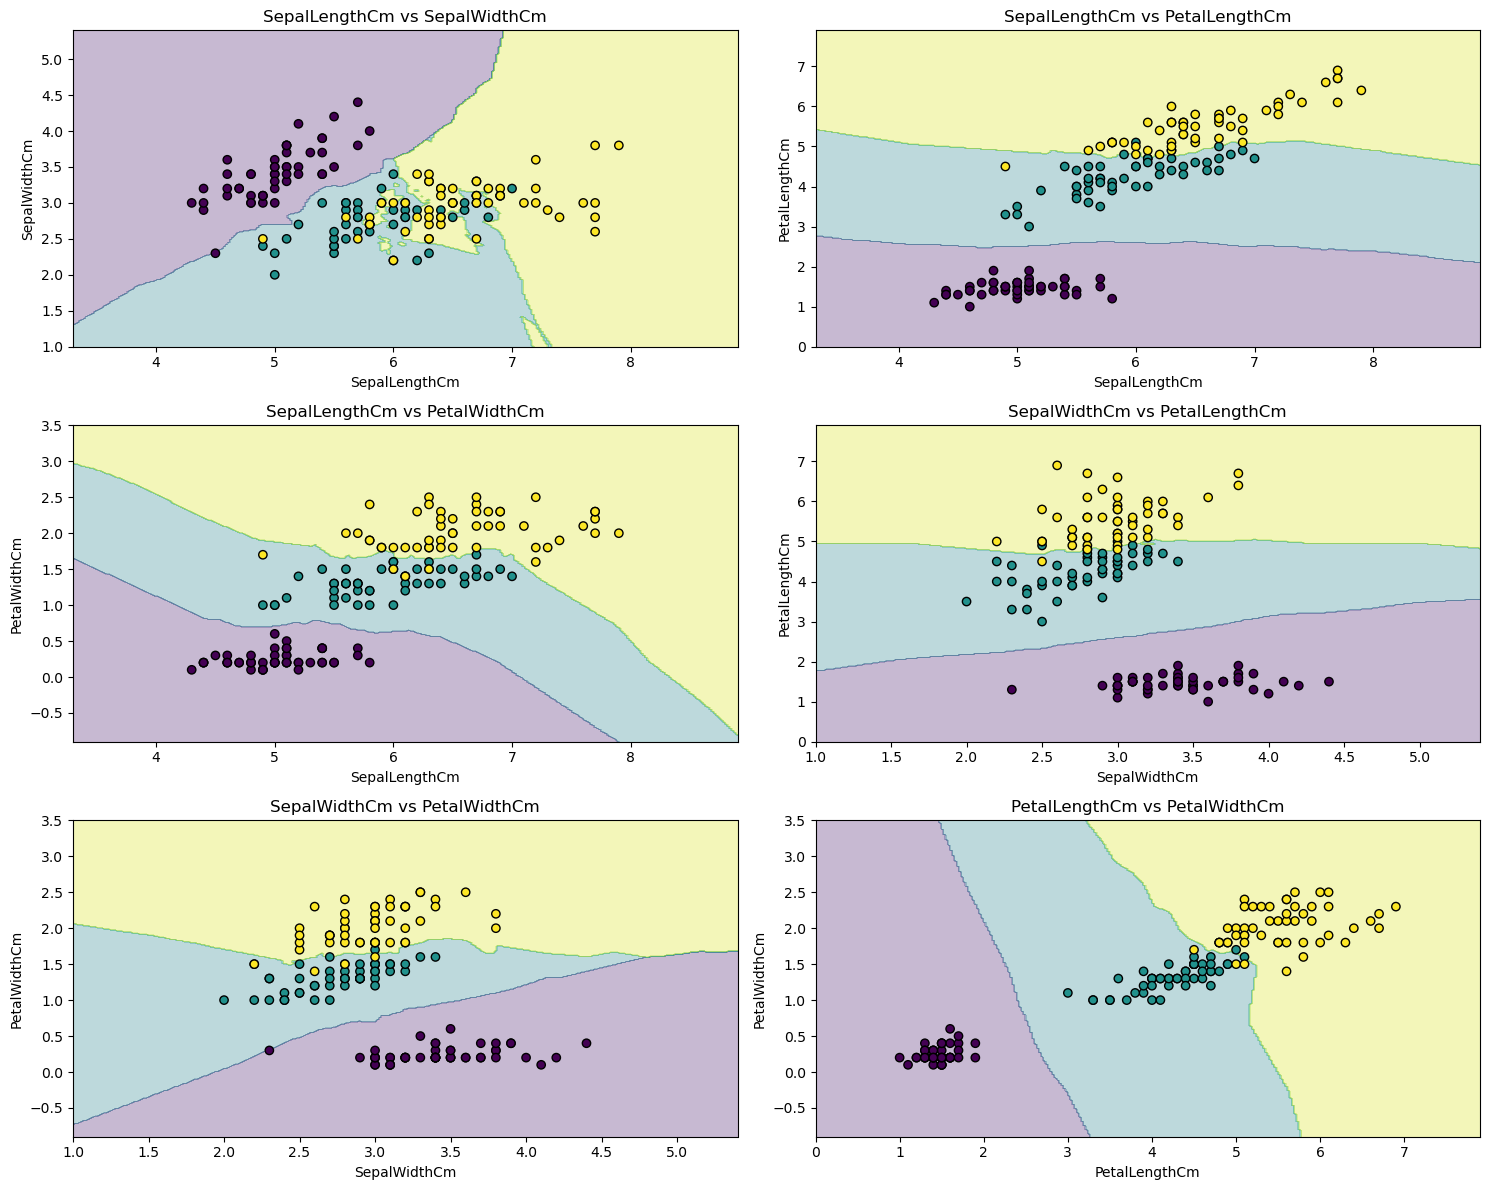

In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from itertools import combinations

df = pd.read_csv("Iris.csv")

features = ["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]
X_full = df[features].values

le = LabelEncoder()
y = le.fit_transform(df["Species"])

pairs = list(combinations(range(4), 2))  # (0,1), (0,2), (0,3), (1,2), ...

plt.figure(figsize=(15, 12))

for i, (f1, f2) in enumerate(pairs, 1):
    X = df[[features[f1], features[f2]]].values
    model = KNeighborsClassifier(n_neighbors=5)
    model.fit(X, y)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(
        np.linspace(x_min, x_max, 300),
        np.linspace(y_min, y_max, 300)
    )

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    plt.subplot(3, 2, i)
    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k')

    plt.title(f"{features[f1]} vs {features[f2]}")
    plt.xlabel(features[f1])
    plt.ylabel(features[f2])

plt.tight_layout()
plt.show()
